In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/immigration-canada/Canada.xlsx


**Objectives:**

By the end of this lab, you will be able to:

- Create data visualizations using Python.
- Utilize various Python libraries for visualization.
- Generate area plots, histograms, and bar charts.
- Produce pie charts, box plots, scatter plots, and bubble charts.
- Create word clouds and waffle charts.
- Develop regression plots using the Seaborn library.

**Dataset:** Immigration to Canada (1980-2013)

**Source:** International Migration Flows to and from Selected Countries - The 2015 Revision.

This dataset includes annual records of international immigrant flows, showing both inflows and outflows. The data covers 45 countries and details immigration based on place of birth, citizenship, or previous/next residence for both foreigners and nationals.

In this lab, we will specifically focus on Canadian immigration data. 

**Access the Canada Immigration dataset here.**

In [2]:
import numpy as np 
import pandas as pd 

In [3]:
import pandas as pd

# Define the URL for the Excel file
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'

try:
    # Read the Excel file into a DataFrame
    df_canada = pd.read_excel(
        url,
        sheet_name='Canada by Citizenship',
        skiprows=range(20),
        skipfooter=2
    )
    
    # Print a success message
    print('Data read into a pandas DataFrame!')
    
    # Optionally, print the first few rows of the DataFrame
    print(df_canada.head())

except Exception as e:
    # Print an error message if something goes wrong
    print(f'An error occurred: {e}')


Data read into a pandas DataFrame!
         Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0    Southern Asia  902  Developing regions    16  ...  2978  3436  3009   
1  Southern Europe  901   Developed regions     1  ...  1450  1223   856   
2  Northern Africa  902  Developing regions    80  ...  3616  3626  4807   
3        Polynesia  902  Developing regions     0  ...     0     0     1   
4  Southern Europe  901   Developed regions     0  ...     0     0     1   

   2007  2008  2009  2010  2011  2012  2013  
0  2652  2111  1746  1758  2203  2635  2004  
1   702   560   716

In [4]:
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
# last five rows
df_canada.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


When analyzing a dataset, it's crucial to start by examining basic information about your DataFrame. You can achieve this using the `info()` method, which provides a concise summary of the DataFrame.

In [6]:
df_canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

To get the list of column headers, use the DataFrame's `.columns` attribute.

In [7]:
df_canada.columns.values 

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

Similarly, to get the list of indices, use the DataFrame's `.index` attribute.

In [8]:
df_canada.index.values 

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

To view the dimensions of the DataFrame, use the `.shape` attribute.

In [9]:
df_canada.shape

(195, 43)

**Note:** The primary data types in pandas objects are `float`, `int`, `bool`, `datetime64[ns]`, `datetime64[ns, tz]` (introduced in version 0.17.0), `timedelta[ns]`, `category` (introduced in version 0.15.0), and `object` (for strings). Additionally, these data types have specific item sizes, such as `int64` and `int32`.

To clean the dataset by removing unnecessary columns, use the `drop()` method in pandas as follows:

In [10]:
# In pandas, axis=0 represents rows (default) and axis=1 represents columns.
df_canada.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# Display the first two rows to verify the changes
print(df_canada.head(2))


        OdName AreaName          RegName             DevName  1980  1981  \
0  Afghanistan     Asia    Southern Asia  Developing regions    16    39   
1      Albania   Europe  Southern Europe   Developed regions     1     0   

   1982  1983  1984  1985  ...  2004  2005  2006  2007  2008  2009  2010  \
0    39    47    71   340  ...  2978  3436  3009  2652  2111  1746  1758   
1     0     0     0     0  ...  1450  1223   856   702   560   716   561   

   2011  2012  2013  
0  2203  2635  2004  
1   539   620   603  

[2 rows x 38 columns]


To rename the columns so that they are more meaningful, use the `rename()` method by passing a dictionary of old and new column names. Here’s how to do it:

In [11]:
# Rename columns for clarity
df_canada.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)

# Display the updated column names
print(df_canada.columns)


Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')


We will also add a 'Total' column that calculates the sum of immigrants for each country over the entire period from 1980 to 2013, as follows:

In [12]:
df_canada['Total'] = df_canada.select_dtypes(include='number').sum(axis=1) 


We can check the number of null values in the dataset using the following method:

In [13]:
df_canada.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [14]:
df_canada.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


**Pandas Intermediate: Indexing and Selection (Slicing)**

**Selecting Columns**

There are two methods to filter by column name:

**Method 1**: Quick and straightforward, but only works if the column name does **not** contain spaces or special characters.
```python
df.column_name  # Returns a Series
```

**Method 2**: More robust and supports filtering multiple columns.
```python
df['column']        # Returns a Series
df[['column 1', 'column 2']]  # Returns a DataFrame
```

**Example:** Let's filter the DataFrame using the 'Country' column.

In [15]:
df_canada.Country  # returns a series

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

Let's filter the DataFrame to include only the list of countries ('OdName') and the data for the years 1980 to 1985.

Note that 'Country' is a string, while the years are integers. For consistency, we will convert all column names to strings later on.

In [16]:
# Convert year column names to strings
df_canada.columns = df_canada.columns.astype(str)

# Now filter the DataFrame with string column names
df_filtered = df_canada[['Country', '1980', '1981', '1982', '1983', '1984', '1985']]


**Selecting Rows**

There are three main ways to select rows:

1. **Using `df.loc[label]`**: Filters by the labels of the index or columns.
2. **Using `df.iloc[index]`**: Filters by the positions of the index or columns.

By default, the dataset's index is a numeric range from 0 to 194, which makes it challenging to query by a specific country. For instance, to find data for Japan, you would need to know the corresponding index value.

This issue can be resolved by setting the 'Country' column as the index using the `set_index()` method.

In [17]:
df_canada.set_index('Country', inplace=True)

In [18]:
df_canada.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [19]:
# remove the name of the index
df_canada.index.name = None

**Example:** Let's view the number of immigrants from Japan (row 87) for the following scenarios:

1. The full row data (all columns).
2. Data for the year 2013.
3. Data for the years 1980 to 1985.

In [20]:
df_canada.loc['Japan']

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [21]:
df_canada.loc['Japan']

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [22]:
df_canada[df_canada.index == 'Japan']

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Japan,Asia,Eastern Asia,Developed regions,701,756,598,309,246,198,248,...,1067,1212,1250,1284,1194,1168,1265,1214,982,27707


In [23]:
df_canada[df_canada.index == 'Japan'].T.squeeze()

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [24]:
print(df_canada.iloc[87, 36])

982


In [25]:
df_canada.loc['Japan', '2013']

982

In [26]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [27]:
df_canada.columns = list(map(str, df_canada.columns))

**Filtering Based on a Condition**

To filter the DataFrame based on a condition, pass the condition as a boolean vector.

For example, to filter the DataFrame to show data for Asian countries (where `AreaName` is 'Asia'), use the following approach:

In [28]:
# Create the boolean series based on the condition
condition = df_canada['Continent'] == 'Asia'
print(condition)

Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


In [29]:
# 2. pass this condition into the dataFrame
df_canada[condition]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,370,529,460,354,203,200,196,233,288,6538
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
"China, Hong Kong Special Administrative Region",Asia,Eastern Asia,Developing regions,0,0,0,0,0,0,0,...,729,712,674,897,657,623,591,728,774,9327


In [30]:
# Filter for Continent = Asia and Region = Southern Asia
filtered_df = df_canada[(df_canada['Continent'] == 'Asia') & (df_canada['Region'] == 'Southern Asia')]
print(filtered_df)

                           Continent         Region             DevName  1980  \
Afghanistan                     Asia  Southern Asia  Developing regions    16   
Bangladesh                      Asia  Southern Asia  Developing regions    83   
Bhutan                          Asia  Southern Asia  Developing regions     0   
India                           Asia  Southern Asia  Developing regions  8880   
Iran (Islamic Republic of)      Asia  Southern Asia  Developing regions  1172   
Maldives                        Asia  Southern Asia  Developing regions     0   
Nepal                           Asia  Southern Asia  Developing regions     1   
Pakistan                        Asia  Southern Asia  Developing regions   978   
Sri Lanka                       Asia  Southern Asia  Developing regions   185   

                            1981  1982  1983  1984  1985  1986  ...   2005  \
Afghanistan                   39    39    47    71   340   496  ...   3436   
Bangladesh                    84 

**Visualizing Data Using Matplotlib**

**Matplotlib: The Standard Python Visualization Library**

Matplotlib is the primary plotting library we will use in this course. According to its website:

> *Matplotlib is a Python 2D plotting library that produces publication-quality figures in various hardcopy formats and interactive environments across platforms. It can be used in Python scripts, the Python and IPython shells, Jupyter notebooks, web application servers, and several graphical user interface toolkits.*

For impactful visualizations with Python, Matplotlib is an essential tool.

**Matplotlib.pyplot**

A key component of Matplotlib is `matplotlib.pyplot`. This is the library's scripting layer, which provides a collection of command-style functions that make Matplotlib work like MATLAB. Each `pyplot` function modifies a figure—whether it's creating a figure, setting up a plotting area, plotting lines, or adding labels.

In this lab, we'll use `pyplot` to generate line plots. Later, we'll explore the Artist layer to see how it differs from the scripting layer.

To get started, import Matplotlib and `matplotlib.pyplot` as follows:

In [31]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [32]:
mpl.style.use(['ggplot'])

**Plotting in Pandas**

Pandas includes built-in plotting capabilities via Matplotlib, making it easy to visualize data. You can plot data by simply appending the `.plot()` method to a Series or DataFrame.

**Documentation**:

- **Plotting with Series**
- **Plotting with DataFrames**

**Line Plots (Series/DataFrame)**

**What is a Line Plot and Why Use It?**

A line plot, or line chart, displays information as a series of data points, called 'markers,' connected by straight line segments. It is commonly used for visualizing continuous data and is particularly effective for trend analysis over time.

**Case Study:**

In 2010, Haiti experienced a catastrophic magnitude 7.0 earthquake that caused widespread devastation and affected around three million people. In response, the Government of Canada increased its efforts to accept refugees from Haiti. We can visualize this humanitarian effort using a line plot.

**Objective:** Plot a line graph of immigration from Haiti using `df.plot()`.



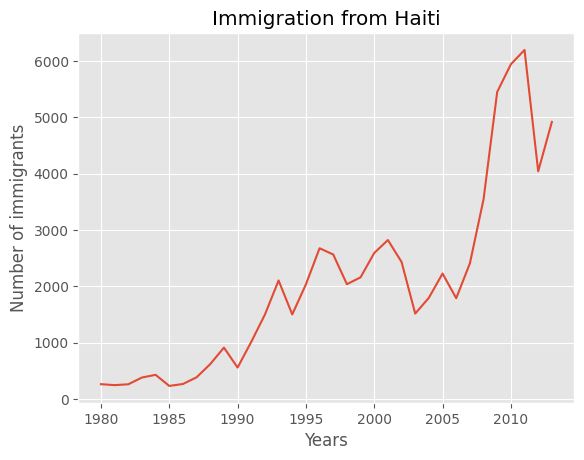

In [33]:
# Extract the data series for Haiti
haiti_data = df_canada.loc['Iraq', years]

# Plot the data using df.plot()
haiti_data.plot(kind='line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

We can clearly see that the number of immigrants from Haiti surged from 2010, reflecting Canada's increased efforts to accept Haitian refugees. To highlight this spike on the plot, we can use the `plt.text()` method for annotation.

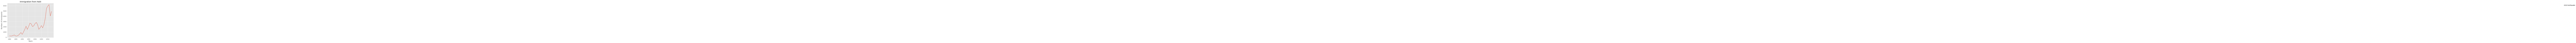

In [39]:
haiti_data.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake.
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # ensure the y-coordinate is taken from the actual data

plt.show()


With just a few lines of code, you can quickly identify and visualize the spike in immigration!

Quick note on x and y values in `plt.text(x, y, label)`:

- The x-axis (years) is of type 'integer', so we specify x as the year. The y-axis (number of immigrants) is also an integer, so we specify y as the value, e.g., `plt.text(2010, 6000, '2010 Earthquake')`.
- If the years were stored as strings, we would specify x as the index position of the year. For example, if the 20th index represents the year 2000, we would use `plt.text(20, 6000, '2010 Earthquake')`.

We will cover advanced annotation methods in later modules.

We can also add more countries to the line plot for meaningful comparisons of immigration from different countries.

Question: Let's compare the number of immigrants from India and China from 1980 to 2013.

Step 1: Get the dataset for China and India, and display the DataFrame.


In [43]:
df_CI = df_canada.loc[['China', 'India'], years]
df_CI.head()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


<Axes: >

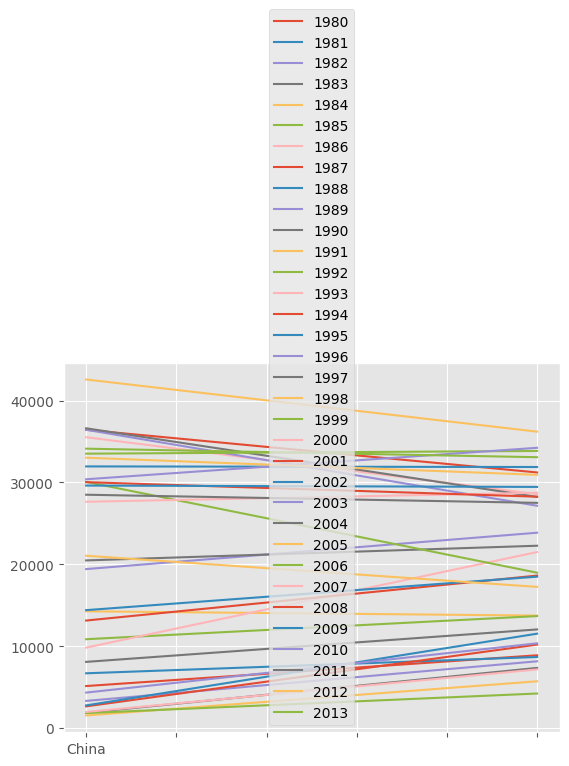

In [44]:
df_CI.plot(kind='line')

That doesn't look right...

Recall that pandas plots the indices on the x-axis and the columns as individual lines on the y-axis. Since `df_CI` is a DataFrame with countries as the index and years as the columns, we must first transpose the DataFrame using the `transpose()` method to swap the rows and columns.


In [45]:
df_CI = df_CI.transpose()
df_CI.head()

,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


<Axes: >

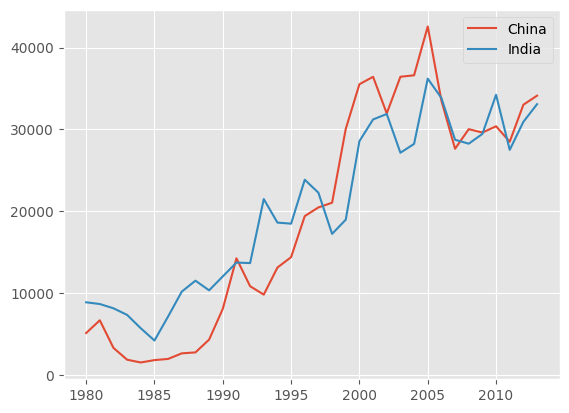

In [46]:
df_CI.plot(kind='line')

In [47]:
 df_CI.index

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype='object')

In [48]:
df_CI.index = df_CI.index.map(int)

In [49]:
df_CI.index 

Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
      dtype='int64')

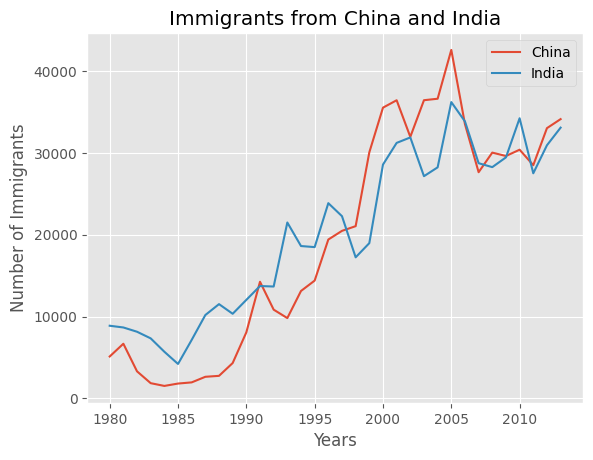

In [51]:
df_CI.plot(kind='line')

plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

From the above plot, we can observe that China and India have very similar immigration trends over the years.

Note: Why didn't we need to transpose Haiti's DataFrame before plotting, like we did for `df_CI`?

That's because `haiti` is a Series, not a DataFrame, and has the years as its indices, as shown below.


In [54]:
print(type(haiti_data))
print(haiti_data.head(5))

<class 'pandas.core.series.Series'>
1980    262
1981    245
1982    260
1983    380
1984    428
Name: Iraq, dtype: object


#### Area Plots

In the last module, we created a line plot that visualized the top 5 countries contributing the most immigrants to Canada from 1980 to 2013. With a small modification to the code, we can visualize this plot as a cumulative plot, also known as a Stacked Line Plot or Area Plot.

In [56]:
# Sort the DataFrame based on the 'Total' column in descending order
df_canada.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# Get the top 5 entries
df_top5 = df_canada.head()

# Select only the columns representing the years and transpose the DataFrame
df_top5 = df_top5[years].transpose()

# Display the first few rows of the transposed DataFrame
df_top5.head()


,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Area plots are stacked by default. To produce a stacked area plot, each column must contain either all positive or all negative values (any NaN values will default to 0). To create an unstacked plot, pass `stacked=False` to the plotting function.

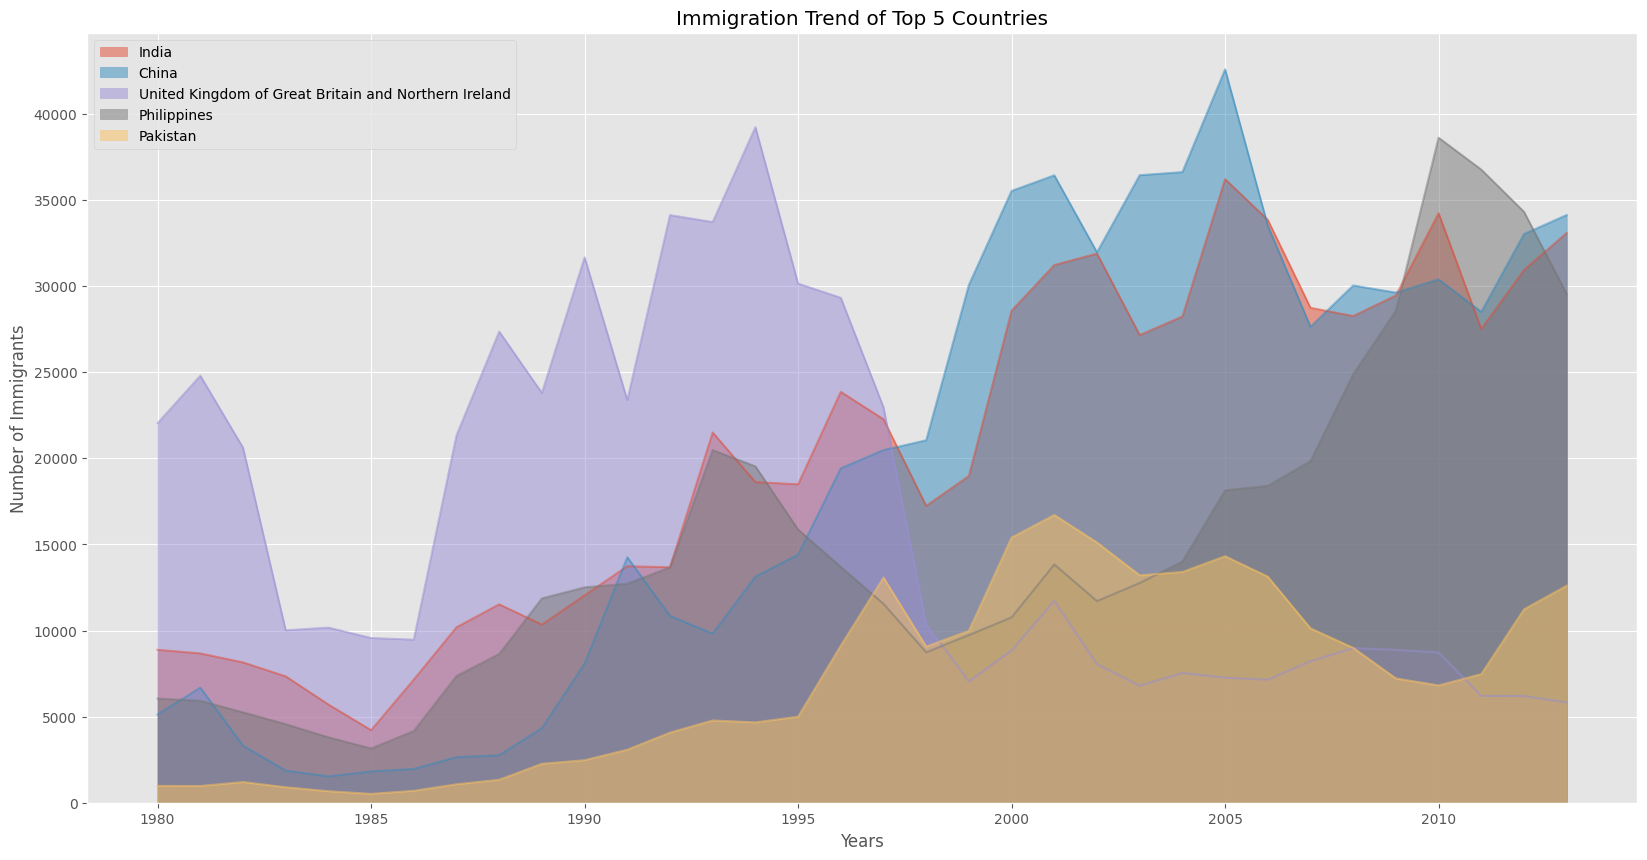

In [57]:
# Change the index values of df_top5 to type integer for plotting
df_top5.index = df_top5.index.map(int)

# Plot the area plot
df_top5.plot(kind='area', 
             stacked=False,
             figsize=(20, 10))  # Pass a tuple (x, y) size

# Add title and labels
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# Show the plot
plt.show()


### Two Types of Plotting

As we discussed in the video lectures, there are two styles/options for plotting with Matplotlib: using the Artist layer and using the scripting layer.

#### Option 1: Scripting Layer (Procedural Method) - using `matplotlib.pyplot` as `plt`

You can use `plt` (i.e., `matplotlib.pyplot`) and add more elements by calling different methods procedurally; for example, `plt.title(...)` to add a title or `plt.xlabel(...)` to add a label to the x-axis.

**Example:**
```python
# Option 1: This is what we have been using so far
df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()
```

#### Option 2: Artist Layer (Object-Oriented Method) - using an Axes instance from Matplotlib (preferred)

You can use an Axes instance of your current plot and store it in a variable (e.g., `ax`). You can add more elements by calling methods with a slight change in syntax (by adding `set_` to the previous methods). For example, use `ax.set_title()` instead of `plt.title()` to add a title, or `ax.set_xlabel()` instead of `plt.xlabel()` to add a label to the x-axis.

This option is sometimes more transparent and flexible, especially for advanced plots (particularly when having multiple plots, as you will see later).

In this course, we will stick to the scripting layer, except for some advanced visualizations where we will need to use the artist layer to manipulate advanced aspects of the plots.



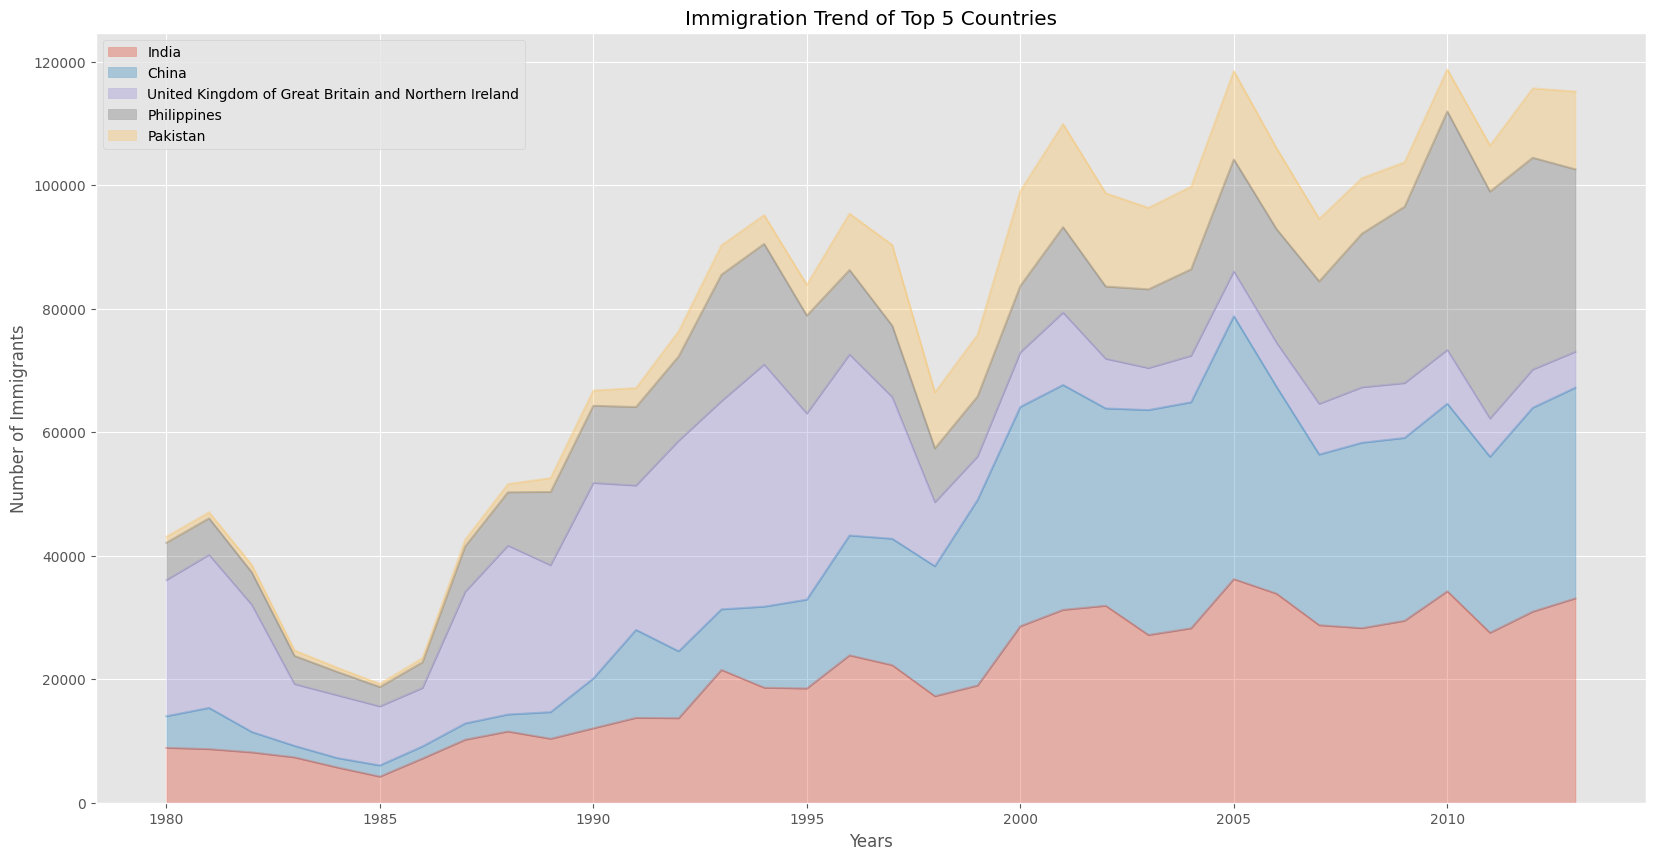

In [58]:
# Option 2: Preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

# Set the title and labels using the Axes instance
ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

# Show the plot
plt.show()


**Question:** Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45.


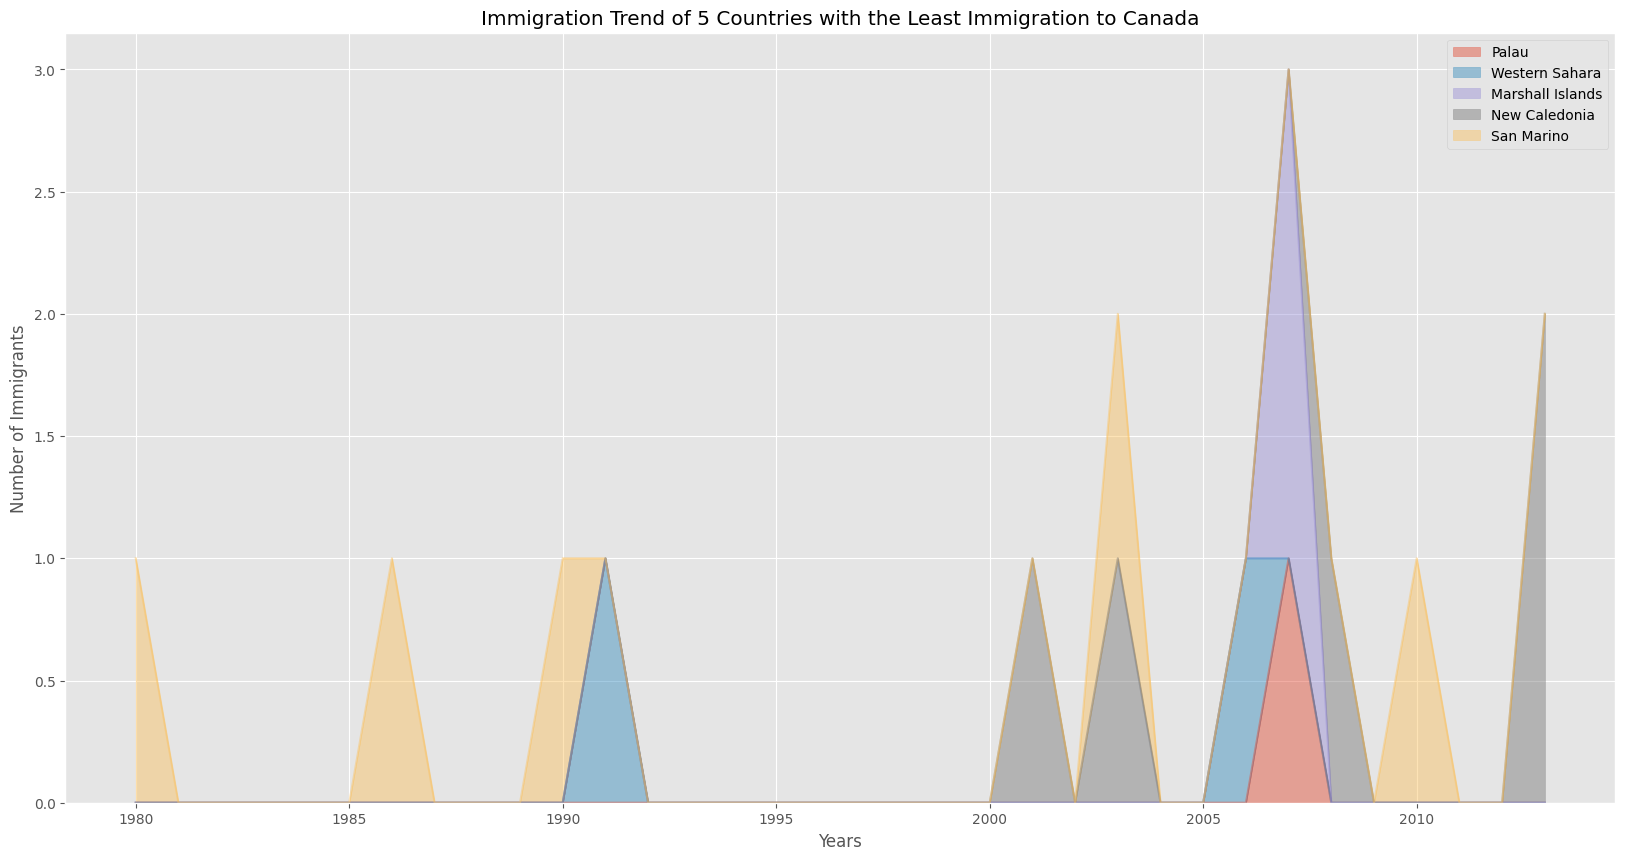

In [61]:
# Sort the DataFrame based on the 'Total' column in ascending order
df_least5 = df_canada.sort_values(['Total'], ascending=True, axis=0)

# Get the top 5 entries with the least immigration
df_least5 = df_least5.head(5)

# Select only the columns representing the years and transpose the DataFrame
df_least5 = df_least5[years].transpose()

# Display the first few rows of the transposed DataFrame to verify
df_least5.head()

# Plot the stacked area plot with the specified transparency
df_least5.plot(kind='area', alpha=0.45, figsize=(20, 10))

# Set title and labels
plt.title('Immigration Trend of 5 Countries with the Least Immigration to Canada')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# Show the plot
plt.show()


### Histograms

A histogram represents the frequency distribution of a numeric dataset. It works by partitioning the x-axis into bins, assigning each data point in the dataset to a bin, and then counting the number of data points in each bin. Thus, the y-axis represents the frequency or the number of data points in each bin. Note that we can change the bin size, and usually, it needs to be tweaked to display the distribution nicely.

**Question:** What is the frequency distribution of the number (population) of new immigrants from various countries to Canada in 2013?

Before creating the histogram plot, let's first examine the data split into intervals. We will use NumPy's `histogram` method to get the bin ranges and frequency counts as follows:


In [62]:
df_canada['2013'].head()

India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [64]:
# np.histogram returns 2 values: count and bin_edges
count, bin_edges = np.histogram(df_canada['2013'])

# Print the frequency count and bin ranges
print("Frequency count:", count)
print("Bin ranges:", bin_edges)


Frequency count: [178  11   1   2   0   0   0   0   1   2]
Bin ranges: [    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


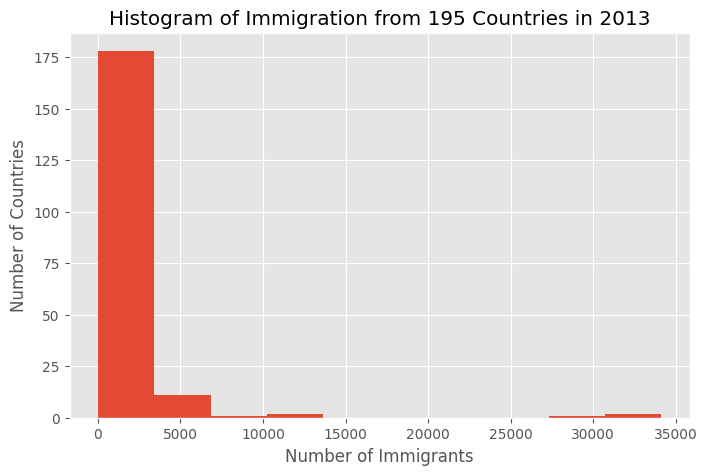

In [65]:
# Plot the histogram
df_canada['2013'].plot(kind='hist', figsize=(8, 5))

# Add title and labels
plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

# Show the plot
plt.show()


In [66]:
# transpose dataframe
df_t = df_canada.loc[['Denmark', 'Norway', 'Sweden','Finland'], years].transpose()
df_t.head()

,Denmark,Norway,Sweden,Finland
1980,272,116,281,208
1981,293,77,308,205
1982,299,106,222,170
1983,106,51,176,70
1984,93,31,128,83


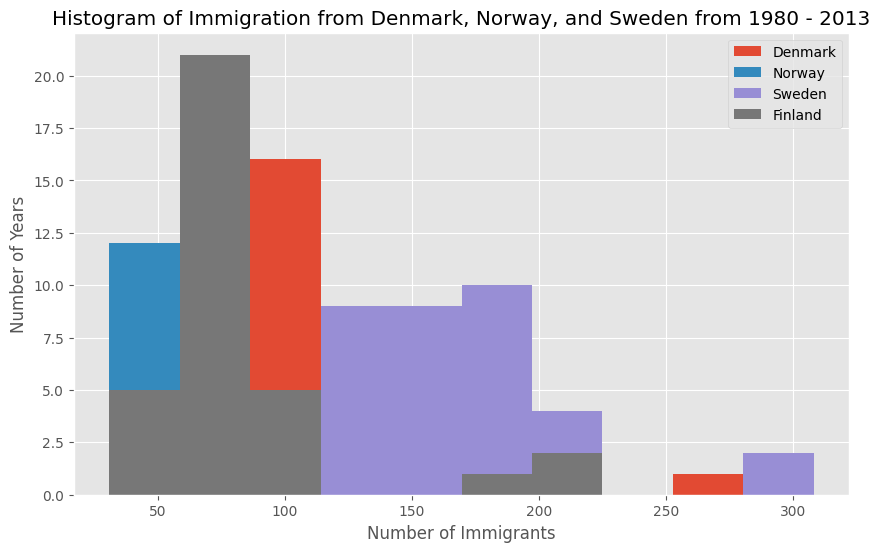

In [67]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Let's make a few modifications to improve the impact and aesthetics of the previous plot:

- Increase the bin size to 15 by passing in the `bins` parameter.
- Set transparency to 60% by passing in the `alpha` parameter.
- Label the x-axis by passing in the `xlabel` parameter.
- Change the colors of the plots by passing in the `color` parameter.



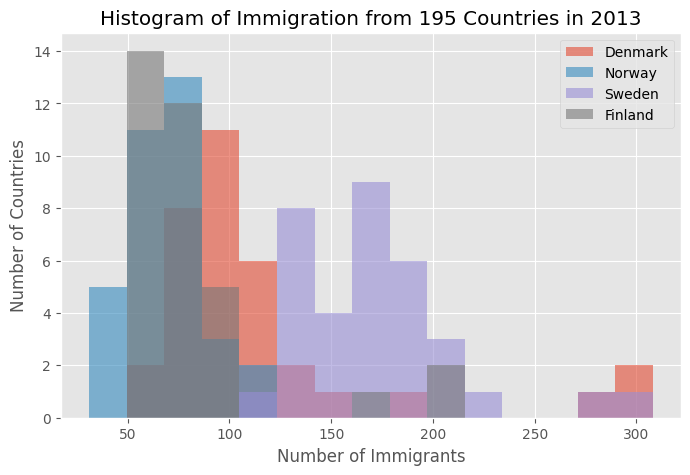

In [71]:

# Plot the histogram with improvements

df_t.plot(kind='hist', 
                    bins=15, 
                    alpha=0.6, 
                    figsize=(8, 5))


# Add title and labels
plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

# Show the plot
plt.show()



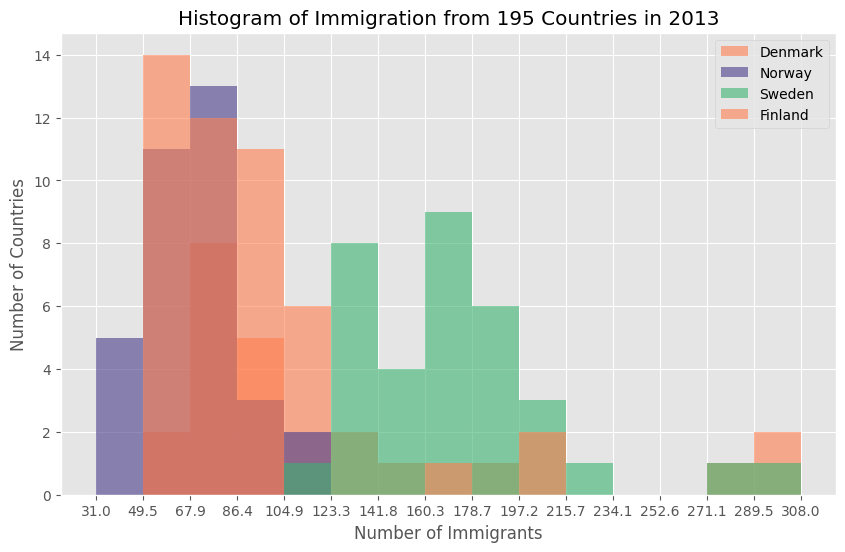

In [74]:
import numpy as np
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# Plot the histogram with improvements

df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )


# Add title and labels
plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

# Show the plot
plt.show()



### Bar Charts (DataFrame)

A bar plot is a way of representing data where the length of the bars represents the magnitude or size of a feature or variable. Bar graphs usually represent numerical and categorical variables grouped in intervals.

To create a bar plot, we can pass one of two arguments via the `kind` parameter in `plot()`:

- `kind='bar'` creates a vertical bar plot.
- `kind='barh'` creates a horizontal bar plot.

#### Vertical Bar Plot

In vertical bar graphs, the x-axis is used for labeling, and the length of the bars on the y-axis corresponds to the magnitude of the variable being measured. Vertical bar graphs are particularly useful for analyzing time series data. One disadvantage is that they lack space for text labeling at the foot of each bar.

Let's start by analyzing the effect of Iceland's Financial Crisis:

The 2008-2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression from 2008 to 2011 and significant political unrest.

**Question:** Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from 1980 to 2013.


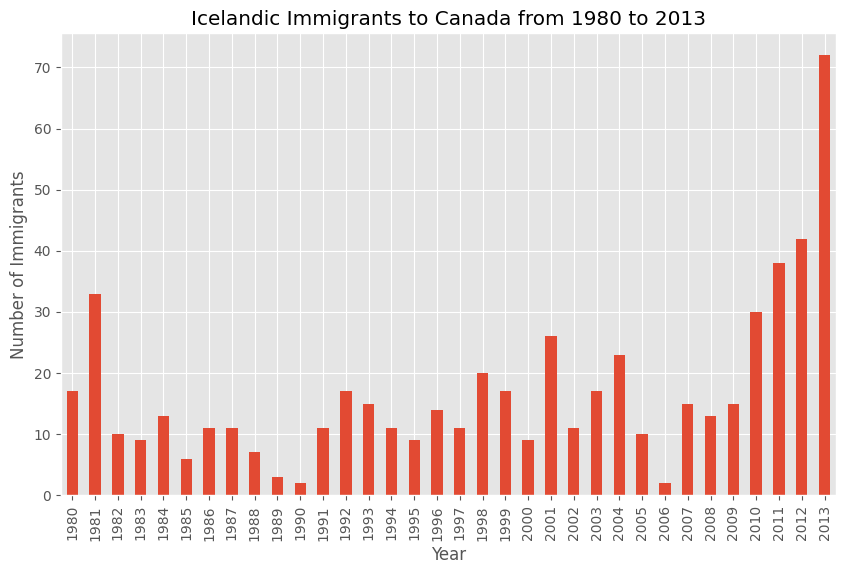

In [76]:
# Select data for Iceland from the DataFrame
df_iceland = df_canada.loc['Iceland', years]

# Plot the bar chart
df_iceland.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Year')  # x-label
plt.ylabel('Number of Immigrants')  # y-label
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')  # title

# Show the plot
plt.show()


The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008.

Let's annotate this on the plot using the `annotate` method from the scripting layer or the `pyplot` interface. We will pass in the following parameters:

- **s**: str, the text of the annotation.
- **xy**: Tuple specifying the (x,y) point to annotate (in this case, the end point of the arrow).
- **xytext**: Tuple specifying the (x,y) point to place the text (in this case, the start point of the arrow).
- **xycoords**: The coordinate system that `xy` is given in - 'data' uses the coordinate system of the object being annotated (default).
- **arrowprops**: Takes a dictionary of properties to draw the arrow:
  - **arrowstyle**: Specifies the arrow style, '->' is a standard arrow.
  - **connectionstyle**: Specifies the connection type. `arc3` is a straight line.
  - **color**: Specifies the color of the arrow.
  - **lw**: Specifies the line width.

I encourage you to read the Matplotlib documentation for more details on annotations: [Matplotlib Annotations](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate).


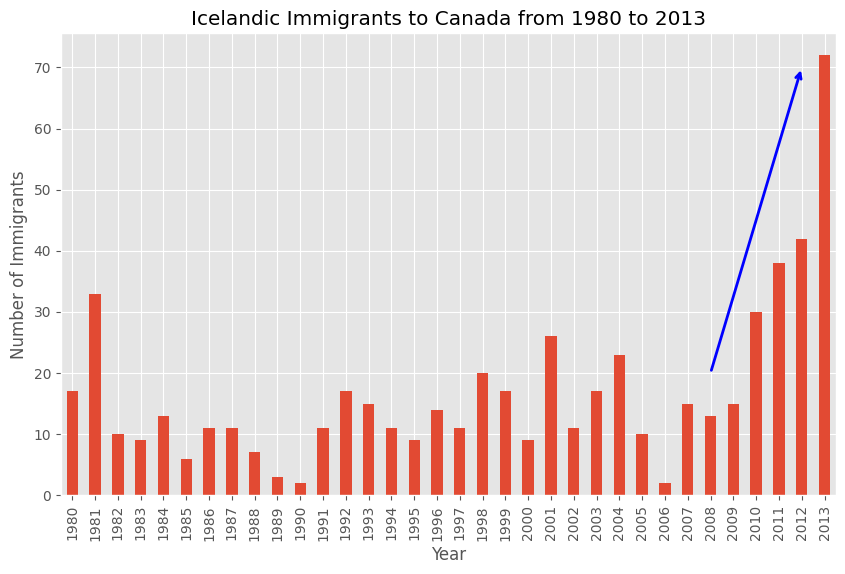

In [77]:
# Plot the bar chart with the x-ticks rotated by 90 degrees
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate the arrow
plt.annotate('',
             xy=(32, 70),             # place head of the arrow at point (year 2012, pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008, pop 20)
             xycoords='data',         # use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Show the plot
plt.show()


Let's also annotate a text to go over the arrow. We will pass in the following additional parameters:

- **rotation**: rotation angle of text in degrees (counter clockwise)
- **va**: vertical alignment of text ['center' | 'top' | 'bottom' | 'baseline']
- **ha**: horizontal alignment of text ['center' | 'right' | 'left']




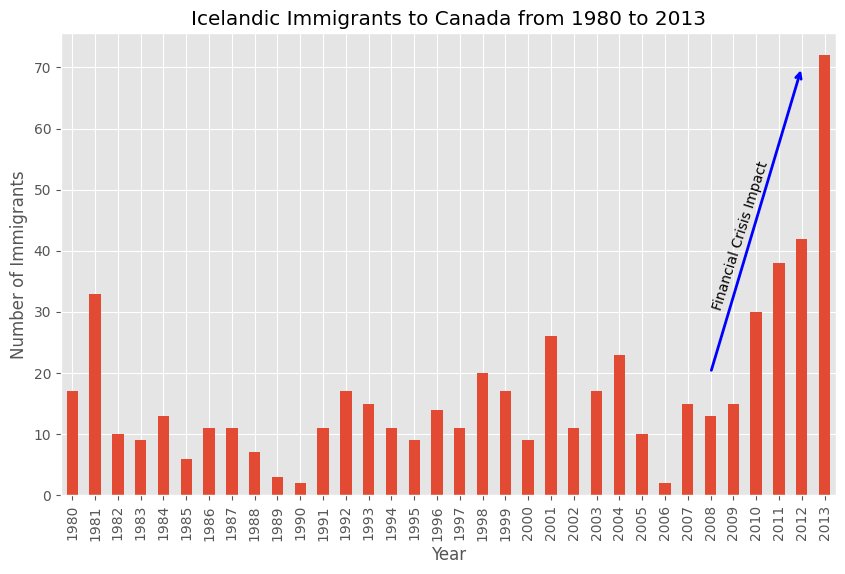

In [79]:

# Plot the bar chart with the x-ticks rotated by 90 degrees
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate the arrow
plt.annotate('',
             xy=(32, 70),             # place head of the arrow at point (year 2012, pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008, pop 20)
             xycoords='data',         # use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate the text
plt.annotate('Financial Crisis Impact',
             xy=(28, 30),             # position of the text
             rotation=72.5,             # rotation angle of text
             va='bottom',             # vertical alignment of text
             ha='left'                # horizontal alignment of text
            )


# Show the plot
plt.show()


### Horizontal Bar Plot

Sometimes it is more practical to represent the data horizontally, especially if you need more room for labeling the bars. In horizontal bar graphs, the y-axis is used for labeling, and the length of the bars on the x-axis corresponds to the magnitude of the variable being measured. As you will see, there is more room on the y-axis to label categorical variables.

**Question:** Using the scripting layer and the `df_can` dataset, create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries for the period 1980-2013. Label each country with the total immigrant count.

**Step 1:** Get the data pertaining to the top 15 countries.


<Axes: >

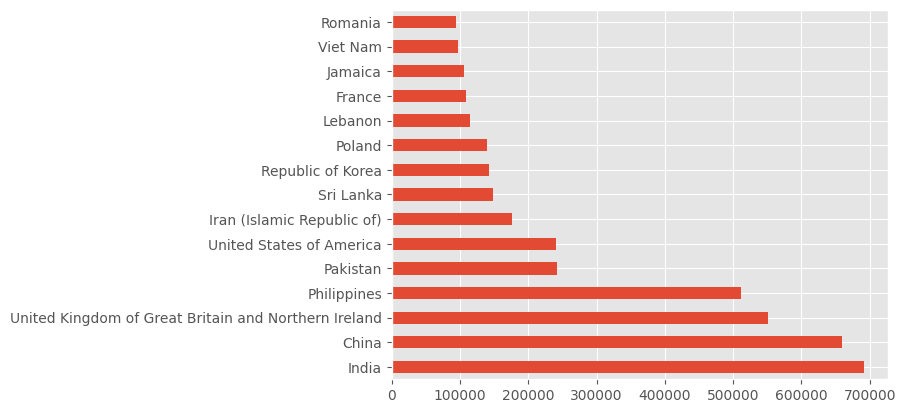

In [81]:
df_canada.sort_values(['Total'], ascending=False, axis=0,inplace=True)
df_can_top15=df_canada['Total'].head(15)
df_can_top15.plot(kind='barh')

**Step 2:** Plot the data:

- Use `kind='barh'` to generate a bar chart with horizontal bars.
- Choose an appropriate size for the plot, label your axes, and give the plot a title.
- Loop through the countries and annotate the immigrant population using the `annotate` function of the scripting interface.


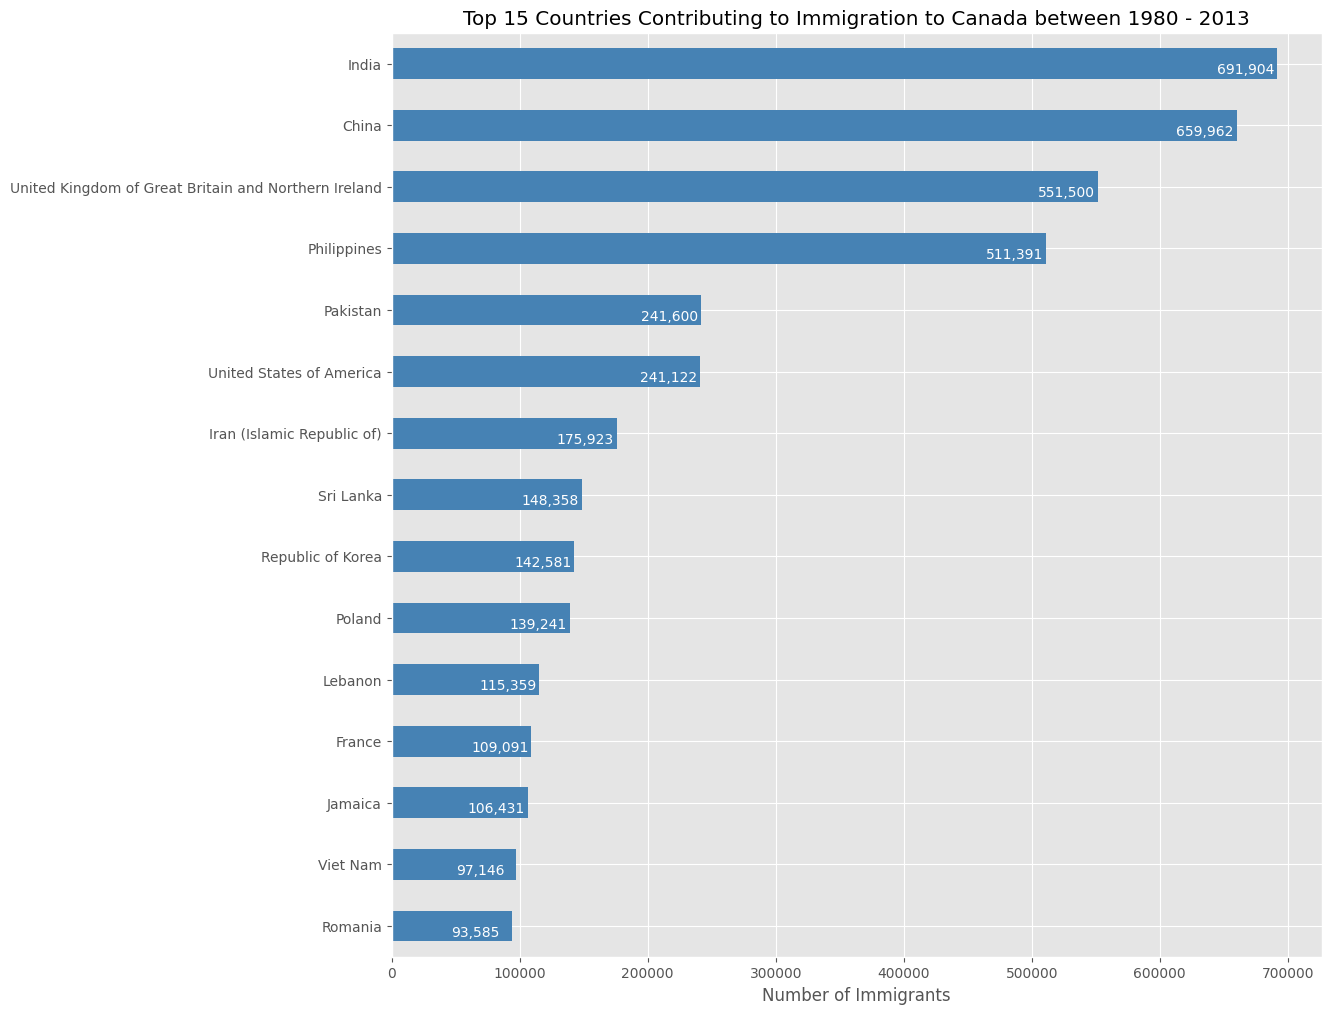

In [83]:
# Sort the DataFrame by 'Total' in ascending order
df_canada.sort_values(by='Total', ascending=True, inplace=True)

# Get the top 15 countries
df_top15 = df_canada['Total'].tail(15)

# Plot the horizontal bar chart
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Countries Contributing to Immigration to Canada between 1980 - 2013')

# Annotate value labels to each country
for index, value in enumerate(df_top15):
    label = format(int(value), ',')  # Format int with commas
    # Place text at the end of the bar (adjust x and y to fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.1), color='white', va='center')

plt.show()


### Pie Charts

A pie chart is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as they are widely used in business and media. We can create pie charts in Matplotlib by passing in the `kind='pie'` keyword.

Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

**Step 1:** Gather data.

We will use pandas' `groupby` method to summarize the immigration data by continent. The general process of `groupby` involves the following steps:

1. **Split**: Splitting the data into groups based on some criteria.
2. **Apply**: Applying a function to each group independently, such as `.sum()`, `.count()`, `.mean()`, `.std()`, `.aggregate()`, `.apply()`, etc.
3. **Combine**: Combining the results into a data structure.


In [85]:
# Group countries by continents and apply sum() function
df_continents = df_canada.groupby('Continent', axis=0).sum()

# Note: The output of the groupby method is a 'groupby' object.
# We cannot use it further until we apply a function (e.g., .sum())
#print(type(df_can.groupby('Continent', axis=0)))

# Display the first few rows of the resulting DataFrame
df_continents.head()


/tmp/ipykernel_33/773693023.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_continents = df_canada.groupby('Continent', axis=0).sum()


,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaMiddle AfricaMiddle AfricaWeste...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,Southern AsiaWestern AsiaWestern AsiaEastern A...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,Southern EuropeSouthern EuropeWestern EuropeWe...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,CaribbeanSouth AmericaCaribbeanCaribbeanCentra...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


**Step 2:** Plot the data. We will pass in `kind='pie'` keyword, along with the following additional parameters:

- **autopct**: A string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
- **startangle**: Rotates the start of the pie chart by the specified angle (in degrees) counterclockwise from the x-axis.
- **shadow**: Draws a shadow beneath the pie to give it a 3D feel.


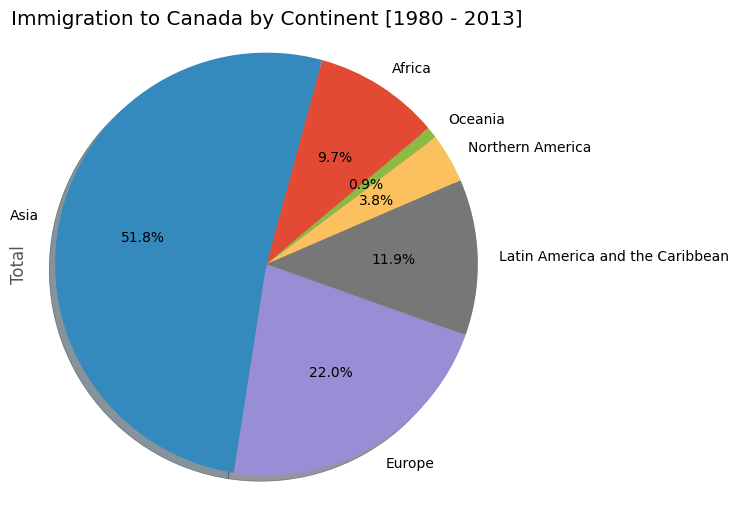

In [86]:
# Create a pie chart
df_continents['Total'].plot(kind='pie',
                            figsize=(6, 6),
                            autopct='%1.1f%%',  # Add percentages
                            startangle=40,      # Start angle 40° (Africa)
                            shadow=True         # Add shadow
                            )

# Add title and set the axis to be equal
plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal')  # Ensures the pie chart is a circle

# Show the plot
plt.show()


The above visual is not very clear; the numbers and text overlap in some instances. Let's make a few modifications to improve the visuals:

1. Remove the text labels on the pie chart by passing in `legend` and add it as a separate legend using `plt.legend()`.
2. Push out the percentages to sit just outside the pie chart by passing in the `pctdistance` parameter.
3. Pass in a custom set of colors for continents by passing in the `colors` parameter.
4. Explode the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and the Caribbean) by passing in the `explode` parameter.


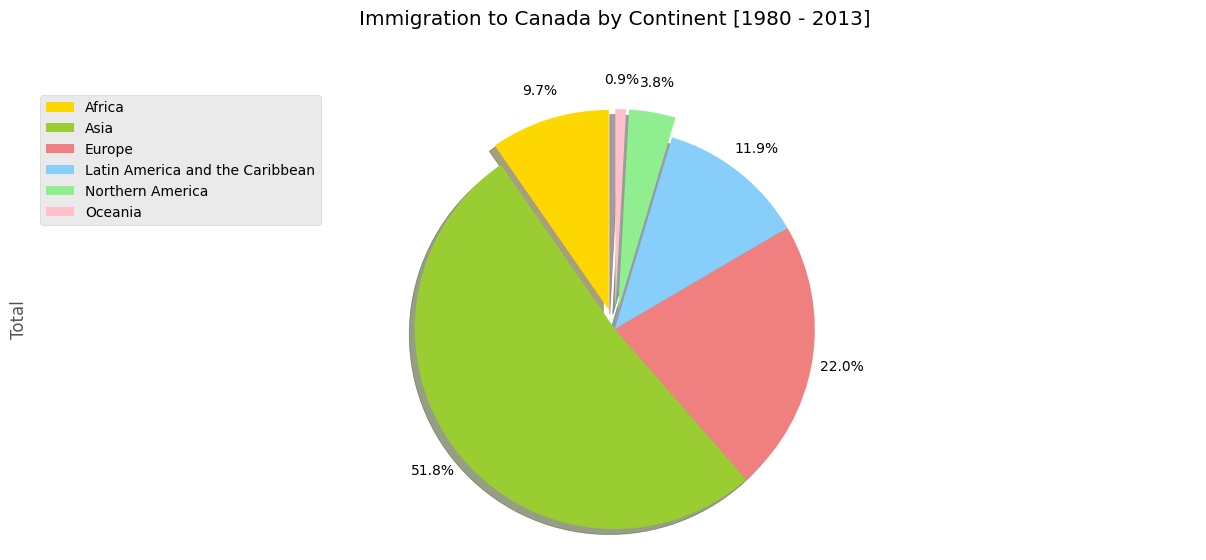

In [87]:
# Custom colors for each continent
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

# Explode values to emphasize certain continents
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]  # Ratio for each continent with which to offset each wedge

# Create a pie chart with the specified modifications
df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',   # Add percentages
                            startangle=90,       # Start angle 90°
                            shadow=True,         # Add shadow
                            labels=None,         # Turn off labels on pie chart
                            pctdistance=1.15,    # Ratio between the center of each pie slice and the start of the text
                            colors=colors_list,  # Custom colors
                            explode=explode_list # 'Explode' certain continents
                            )

# Scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)

# Ensure the pie chart is a circle
plt.axis('equal')

# Add legend
plt.legend(labels=df_continents.index, loc='upper left')

# Show the plot
plt.show()


**Question:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note:** You might need to adjust the explode values to fix any overlapping slice values.



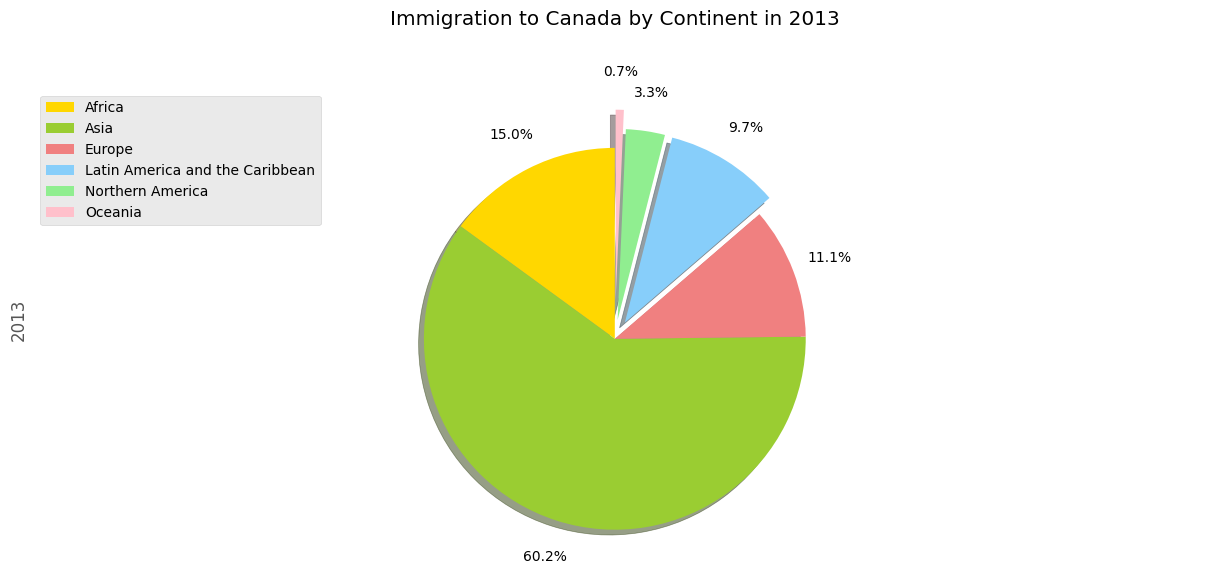

In [88]:
# Custom colors for each continent
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

# Explode values to emphasize certain continents
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2]  # Ratio for each continent with which to offset each wedge

# Create a pie chart for the year 2013
df_continents['2013'].plot(kind='pie',
                           figsize=(15, 6),
                           autopct='%1.1f%%',  # Add percentages
                           startangle=90,      # Start angle 90°
                           shadow=True,        # Add shadow
                           labels=None,        # Turn off labels on pie chart
                           pctdistance=1.2,    # Ratio between the pie center and start of text label
                           colors=colors_list, # Custom colors
                           explode=explode_list # 'Explode' certain continents
                           )

# Scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12)

# Ensure the pie chart is a circle
plt.axis('equal')

# Add legend
plt.legend(labels=df_continents.index, loc='upper left')

# Show the plot
plt.show()


### Box Plots

A box plot is a way of statistically representing the distribution of data through five main dimensions:

- **Minimum**: The smallest number in the dataset.
- **First Quartile**: The middle number between the minimum and the median.
- **Second Quartile (Median)**: The middle number of the sorted dataset.
- **Third Quartile**: The middle number between the median and the maximum.
- **Maximum**: The highest number in the dataset.


To make a box plot, we can use `kind='box'` in the `plot` method invoked on a pandas Series or DataFrame.

Let's plot the box plot for Japanese immigrants between 1980 and 2013.

**Step 1:** Get the dataset. Even though we are extracting the data for just one country, we will obtain it as a DataFrame. This will help us call the `dataframe.describe()` method to view the percentiles.


In [89]:
# To get a DataFrame, place extra square brackets around 'Japan'
df_japan = df_canada.loc[['Japan'], years].transpose()

# Display the first few rows of the DataFrame
df_japan.head()


,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


We can immediately make a few key observations from the plot above:

- The minimum number of immigrants is around 200 (min), the maximum number is around 1300 (max), and the median number of immigrants is around 900 (median).
- 25% of the years for the period 1980-2013 had an annual immigrant count of approximately 500 or fewer (First quartile).
- 75% of the years for the period 1980-2013 had an annual immigrant count of approximately 1100 or fewer (Third quartile).

We can view the actual numbers by calling the `describe()` method on the DataFrame.


In [90]:
df_japan.describe()

,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


One of the key benefits of box plots is comparing the distribution of multiple datasets. In one of the previous labs, we observed that China and India had very similar immigration trends. Let's analyze these two countries further using box plots.

**Question:** Compare the distribution of the number of new immigrants from India and China for the period 1980-2013.

**Step 1:** Get the dataset for China and India and call the DataFrame `df_CI`.


In [91]:
# Get the dataset for India and China and transpose it
df_CI = df_canada.loc[['India', 'China'], years].transpose()

# Display the first few rows of the DataFrame
df_CI.head()


,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


In [92]:

df_CI.describe()

,India,China
count,34.000000,34.000000
mean,20350.117647,19410.647059
std,10007.342579,13568.230790
min,4211.000000,1527.000000
25%,10637.750000,5512.750000
50%,20235.000000,19945.000000
75%,28699.500000,31568.500000
max,36210.000000,42584.000000


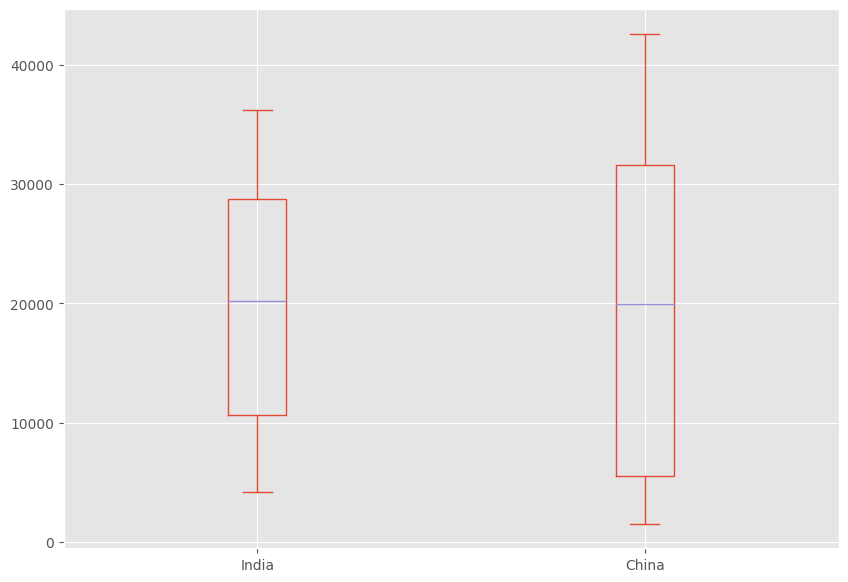

In [94]:
# Plot a box plot for the DataFrame
df_CI.plot(kind='box', figsize=(10, 7))

# Show the plot
plt.show()


We can observe that while both countries have around the same median immigrant population (~20,000), China's immigrant population range is more spread out than India's. The maximum population from India for any year (36,210) is around 15% lower than the maximum population from China (42,584).

If you prefer to create horizontal box plots, you can pass the `vert` parameter in.



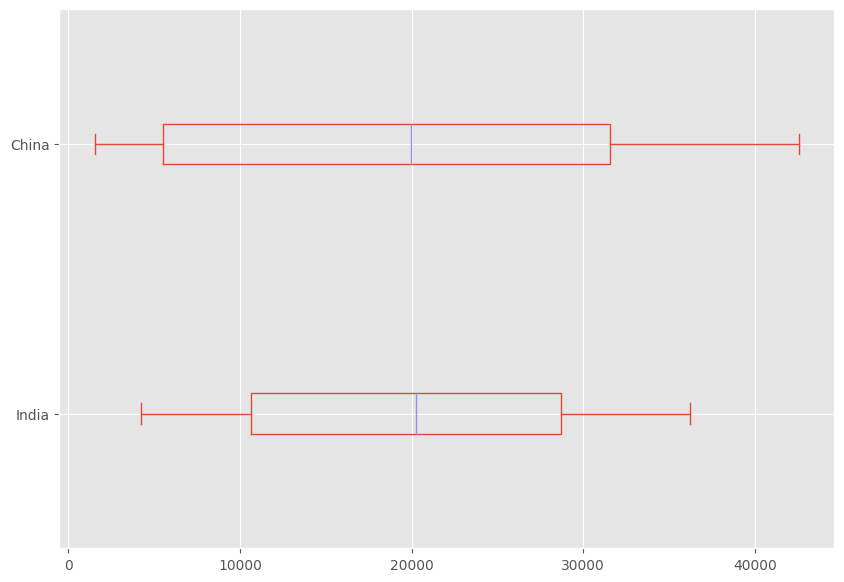

In [95]:
# Plot a horizontal box plot for the DataFrame
df_CI.plot(kind='box', figsize=(10, 7), vert=False)

# Show the plot
plt.show()


### Subplots

Often, we might want to plot multiple plots within the same figure. For example, we might want to perform a side-by-side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a figure (overall canvas) and divide it into subplots, each containing a plot. With subplots, we usually work with the artist layer instead of the scripting layer.

Typical syntax is:

```python
fig = plt.figure()  # Create figure
ax = fig.add_subplot(nrows, ncols, plot_number)  # Create subplots
```

Where:

- **nrows** and **ncols**: These are used to notionally split the figure into (nrows * ncols) sub-axes.
- **plot_number**: This is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first, and has a maximum of nrows * ncols as shown below.


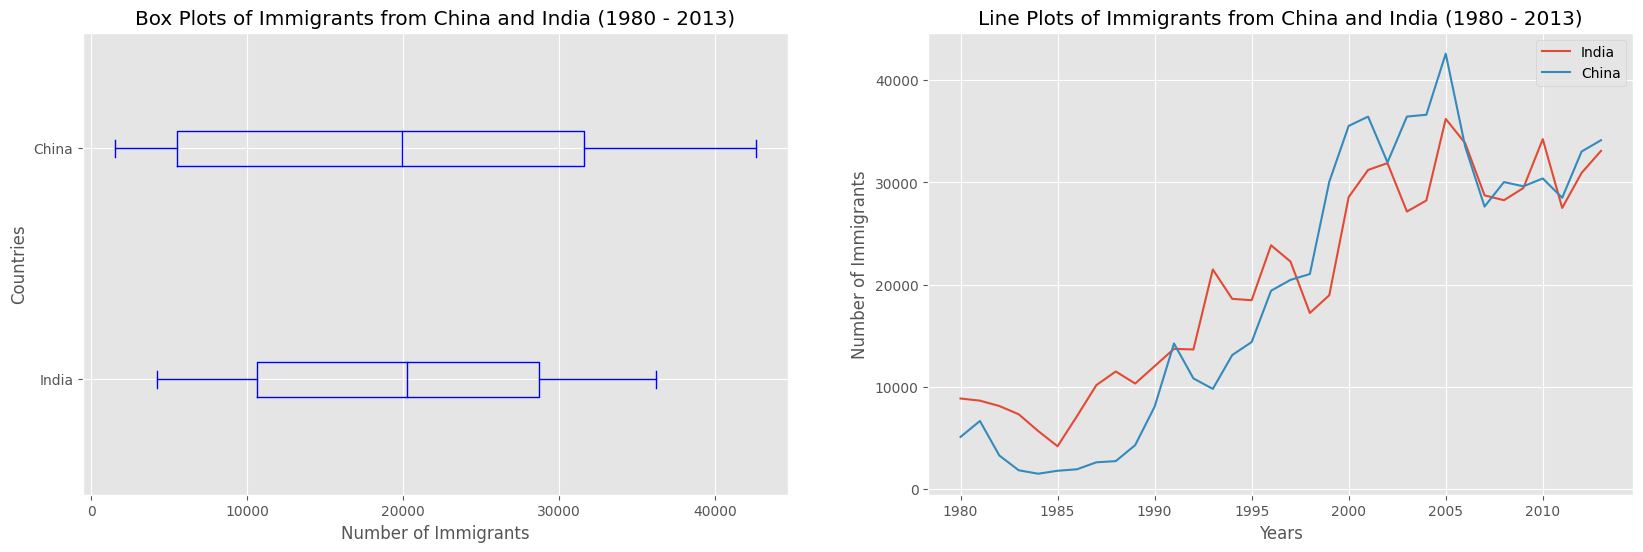

In [96]:
# Create figure
fig = plt.figure()

# Add subplot 1 (1 row, 2 columns, first plot)
ax0 = fig.add_subplot(1, 2, 1)

# Add subplot 2 (1 row, 2 columns, second plot)
ax1 = fig.add_subplot(1, 2, 2)

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0)  # Add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1)  # Add to subplot 2
ax1.set_title('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

# Show the plots
plt.show()


**Tip regarding subplot convention**

When `nrows`, `ncols`, and `plot_number` are all less than 10, there is a convenient shorthand that allows you to specify them as a three-digit number. The hundreds digit represents `nrows`, the tens digit represents `ncols`, and the units digit represents `plot_number`. For example:

```python
subplot(211) == subplot(2, 1, 1)
```

This produces a subaxes in a figure representing the top plot (i.e., the first) in a 2 rows by 1 column notional grid (no grid actually exists, but conceptually this is how the returned subplot has been positioned).

Let's try something a little more advanced.

Previously, we identified the top 15 countries based on total immigration from 1980 to 2013.

**Question:** Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

**Step 1:** Get the dataset. Get the top 15 countries based on total immigrant population. Name the DataFrame `df_top15`.



In [98]:
# Sort the DataFrame by 'Total' column in descending order
df_canada.sort_values(by='Total', inplace=True, ascending=False, axis=0)

# Select the top 15 countries based on total immigration
df_top15 = df_canada.head(15)[years]

# Display the first few rows of the DataFrame
df_top15.head()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603


**Step 2:** Create a new DataFrame that contains the aggregate for each decade. One way to do this:

1. Create a list of all years in the decades 80s, 90s, and 00s.
2. Slice the original DataFrame `df_can` to create a series for each decade and sum across all years for each country.
3. Merge the three series into a new DataFrame. Call your DataFrame `new_df`.



In [99]:
# Lists of years for each decade
years_80s = list(map(str, range(1980, 1990)))
years_90s = list(map(str, range(1990, 2000)))
years_00s = list(map(str, range(2000, 2010)))

# Sum across all years for each country for each decade
df_80s = df_top15[years_80s].sum(axis=1)
df_90s = df_top15[years_90s].sum(axis=1)
df_00s = df_top15[years_00s].sum(axis=1)

# Merge the three series into a new DataFrame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s': df_00s})

# Display the new DataFrame
new_df.head()


,1980s,1990s,2000s
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


<Axes: >

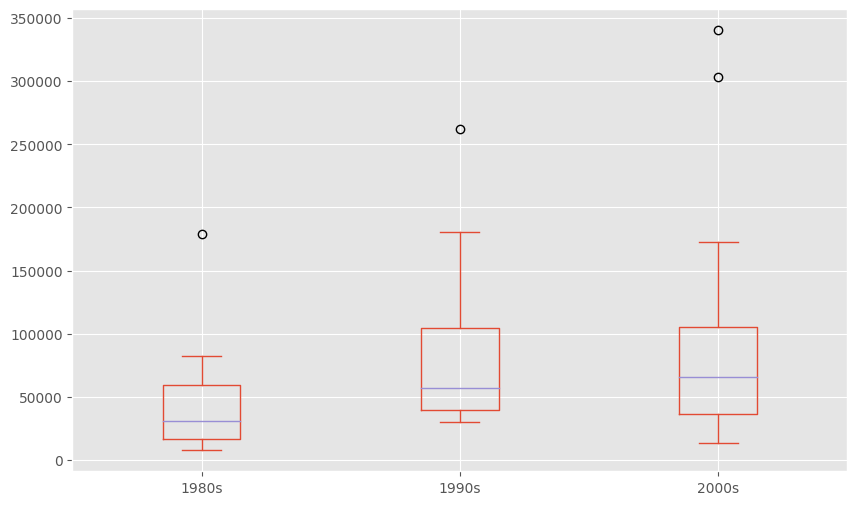

In [101]:
new_df.plot(kind='box',figsize=(10, 6))

Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:

- Larger than Q3 by at least 1.5 times the interquartile range (IQR), or
- Smaller than Q1 by at least 1.5 times the IQR.

Let's look at the decade 2000s as an example:

- Q1 (25%) = 36,101.5
- Q3 (75%) = 105,505.5
- IQR = Q3 - Q1 = 69,404

Using the definition of an outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as an outlier.

- Outlier > 105,505.5 + (1.5 * 69,404)
- Outlier > 209,611.5



### Scatter Plots

A scatter plot (2D) is a useful method of comparing variables against each other. Scatter plots look similar to line plots in that they both map independent and dependent variables on a 2D graph. While the data points are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

Let's start by exploring the following:

Using a scatter plot, let's visualize the trend of total immigration to Canada (all countries combined) for the years 1980 - 2013.

**Step 1:** Get the dataset. Since we are expecting to use the relationship between years and total population, we will convert years to `int` type.



In [102]:
# Use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_canada[years].sum(axis=0))

# Change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# Reset the index to put it back in as a column in the df_tot DataFrame
df_tot.reset_index(inplace=True)

# Rename columns
df_tot.columns = ['year', 'total']

# View the final DataFrame
df_tot.head()


,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


**Step 2:** Plot the data. In Matplotlib, we can create a scatter plot by passing `kind='scatter'` as the plot argument. We will also need to pass in the `x` and `y` keywords to specify the columns that go on the x- and y-axis, respectively.



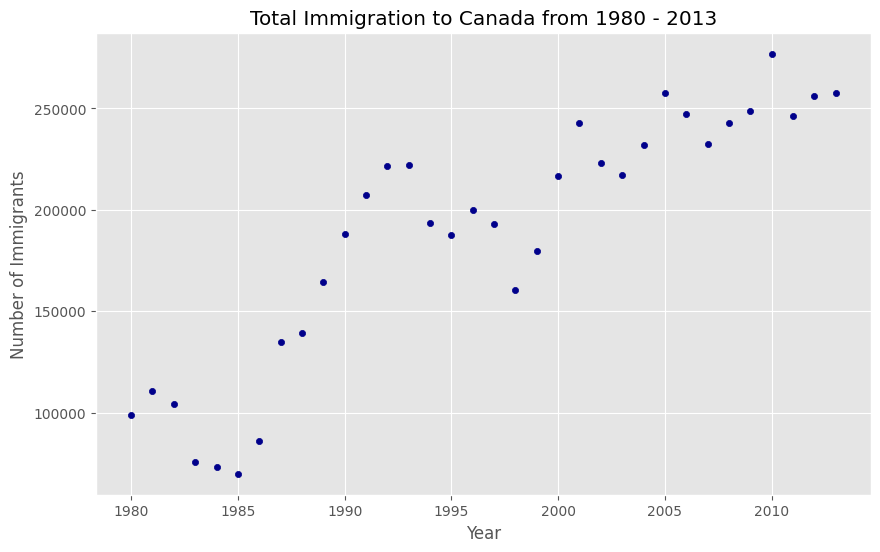

In [104]:
# Create a scatter plot
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

# Add title and labels
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# Show the plot
plt.show()


Notice how the scatter plot does not connect the data points together. We can clearly observe an upward trend in the data: as the years go by, the total number of immigrants increases. We can mathematically analyze this upward trend using a regression line (line of best fit).

Let's try to plot a linear line of best fit and use it to predict the number of immigrants in 2015.

**Step 1:** Get the equation of the line of best fit. We will use NumPy's `polyfit()` method by passing in the following:

- **x**: x-coordinates of the data.
- **y**: y-coordinates of the data.
- **deg**: Degree of the fitting polynomial. 1 = linear, 2 = quadratic, and so on.



In [105]:
# Define x and y variables
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis

# Fit a linear regression line
fit = np.polyfit(x, y, deg=1)

# Output the fit coefficients
fit


array([ 5.56709228e+03, -1.09261952e+07])

The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression \( y = ax + b \), our output has 2 elements \([5.56709228e+03, -1.09261952e+07]\) with the slope in position 0 and intercept in position 1.

**Step 2:** Plot the regression line on the scatter plot.


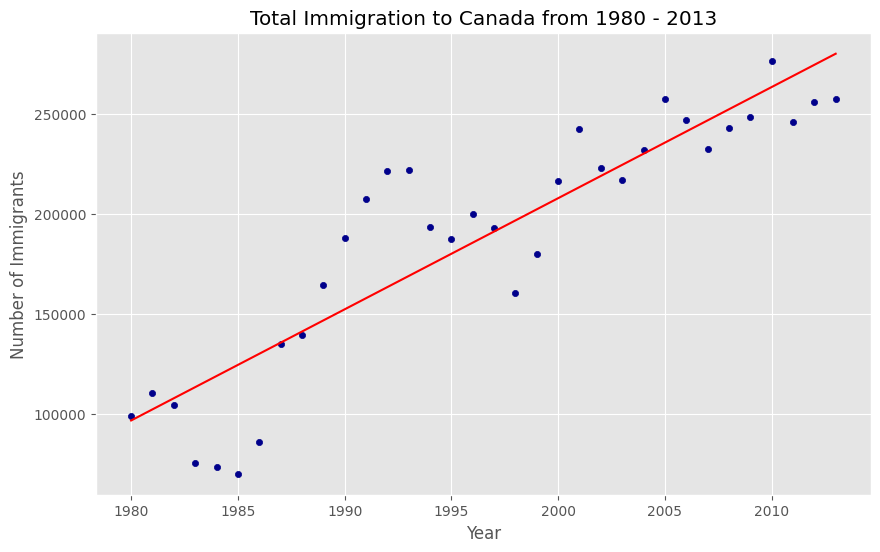

In [106]:

# Scatter plot
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

# Plot the regression line
plt.plot(x, fit[0] * x + fit[1], color='red')  # fit[0] is the slope, fit[1] is the intercept

# Add title and labels
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# Show the plot
plt.show()


### Estimating the Number of Immigrants in 2015

Using the equation of the line of best fit, we can estimate the number of immigrants in 2015:

$ \text{No. Immigrants} = 5567 \times \text{Year} - 10926195 $

$ \text{No. Immigrants} = 5567 \times 2015 - 10926195 $

$ \text{No. Immigrants} = 291,310 $

When compared to the actual numbers from Citizenship and Immigration Canada's (CIC) 2016 Annual Report, we see that Canada accepted 271,845 immigrants in 2015. Our estimated value of 291,310 is within 7% of the actual number, which is pretty good considering our original data came from the United Nations (and might differ slightly from CIC data).

As a side note, we can observe that immigration took a dip around 1993-1997. Further analysis into the topic revealed that in 1993, Canada introduced Bill C-86, which revised the refugee determination system, mostly in a restrictive manner. Further amendments to the Immigration Regulations canceled the sponsorship required for "assisted relatives" and reduced the points awarded to them, making it more difficult for family members (other than the nuclear family) to immigrate to Canada. These restrictive measures had a direct impact on the immigration numbers for the next several years.

### Step 1: Get the Data

1. Create a DataFrame that consists of the numbers associated with Denmark, Norway, and Sweden only. Name it `df_countries`.
2. Sum the immigration numbers across all three countries for each year and turn the result into a DataFrame. Name this new DataFrame `df_total`.
3. Reset the index in place.
4. Rename the columns to `year` and `total`.
5. Display the resulting DataFrame.



In [107]:
# Create a DataFrame that consists of the numbers associated with Denmark, Norway, and Sweden only
df_countries = df_canada.loc[['Denmark', 'Norway', 'Sweden'], years]

# Sum the immigration numbers across all three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=0))

# Reset the index in place
df_total.reset_index(inplace=True)

# Rename the columns to 'year' and 'total'
df_total.columns = ['year', 'total']

# Change the 'year' column to type int
df_total['year'] = df_total['year'].astype(int)

# Display the first few rows of the resulting DataFrame
df_total.head()


,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


<Axes: xlabel='year', ylabel='total'>

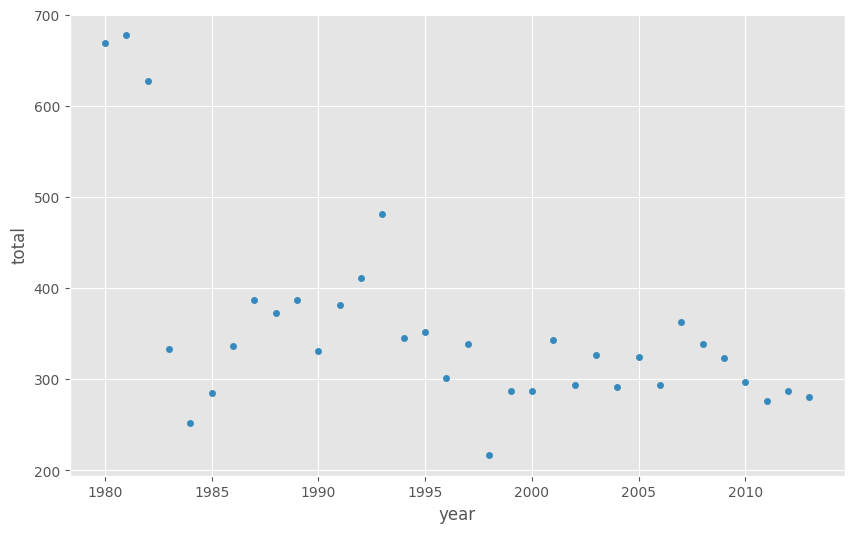

In [108]:
df_total.plot(kind='scatter',x='year',y='total',figsize=(10, 6))

### Bubble Plots

A bubble plot is a variation of the scatter plot that displays three dimensions of data (x, y, z). The data points are replaced with bubbles, and the size of the bubble is determined by the third variable 'z', also known as the weight. In Matplotlib, we can pass in an array or scalar to the keyword `s` in `plot()`, which contains the weight of each point.

Let's start by analyzing the effect of Argentina's Great Depression.

Argentina suffered a great depression from 1998 to 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

Let's analyze the effect of this crisis and compare Argentina's immigration to that of its neighbor Brazil. We'll do this using a bubble plot of immigration from Brazil and Argentina for the years 1980 to 2013. We will set the weights for the bubbles as the normalized value of the population for each year.

**Step 1:** Get the data for Brazil and Argentina. As in the previous example, we will convert the years to type `int` and include them in the DataFrame.


In [109]:
# Transpose the dataframe
df_can_t = df_canada[years].transpose()

# Cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# Label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# Reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# View the changes
df_can_t.head()


,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


**Step 2:** Create the normalized weights.

There are several methods of normalization in statistics, each with its own use. In this case, we will use feature scaling to bring all values into the range [0,1]. The general formula is:

$ X' = \frac{X - \text{min}(X)}{\text{max}(X) - \text{min}(X)} $

where \( X \) is an original value, and \( X' \) is the normalized value. The formula sets the maximum value in the dataset to 1 and the minimum value to 0. The rest of the data points are scaled to a value between 0 and 1 accordingly.


In [110]:
# Normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# Normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())


**Step 3:** Plot the data.

To plot two different scatter plots in one plot, we can include the axes of one plot into the other by passing it via the `ax` parameter. We will also pass in the weights using the `s` parameter. Given that the normalized weights are between 0 and 1, they won't be visible on the plot. Therefore, we will:

1. Multiply weights by 2000 to scale them up on the graph.
2. Add 10 to compensate for the minimum value (which has a 0 weight and therefore scales with x2000).



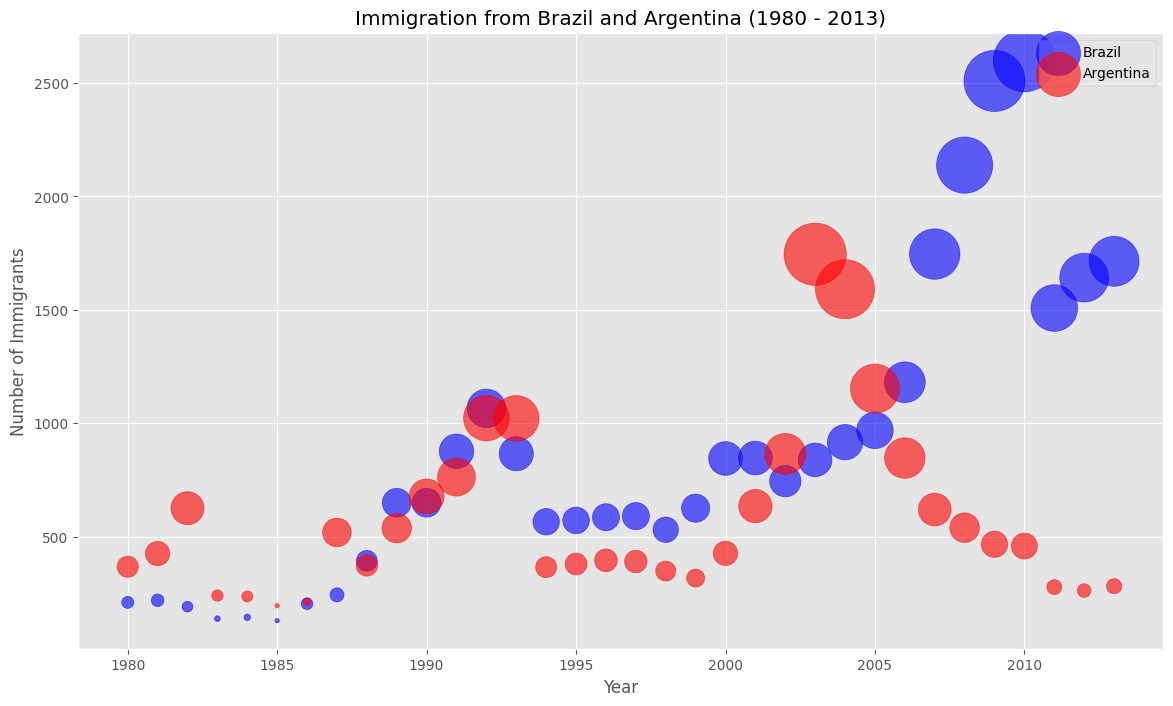

In [111]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot Brazil data
ax.scatter(df_can_t['Year'], df_can_t['Brazil'], 
           s=norm_brazil * 2000 + 10,  # Scale and add 10 to normalized weights
           alpha=0.6, 
           c='blue', 
           label='Brazil')

# Plot Argentina data
ax.scatter(df_can_t['Year'], df_can_t['Argentina'], 
           s=norm_argentina * 2000 + 10,  # Scale and add 10 to normalized weights
           alpha=0.6, 
           c='red', 
           label='Argentina')

# Add title and labels
ax.set_title('Immigration from Brazil and Argentina (1980 - 2013)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Immigrants')

# Add legend
ax.legend()

# Show the plot
plt.show()


The size of the bubble corresponds to the magnitude of the immigrating population for that year, compared to the 1980-2013 data. The larger the bubble, the more immigrants in that year.

From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998-2002 Great Depression. We can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 to 1990, just before the onset of the 1998-2002 Great Depression.

On a similar note, Brazil suffered the Samba Effect where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.

**Question:** Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences over time from 1980 to 2013. You can use `df_can_t` that we defined and used in the previous example.

**Step 1:** Normalize the data pertaining to China and India.


In [112]:

# Normalize China data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

# Normalize India data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())


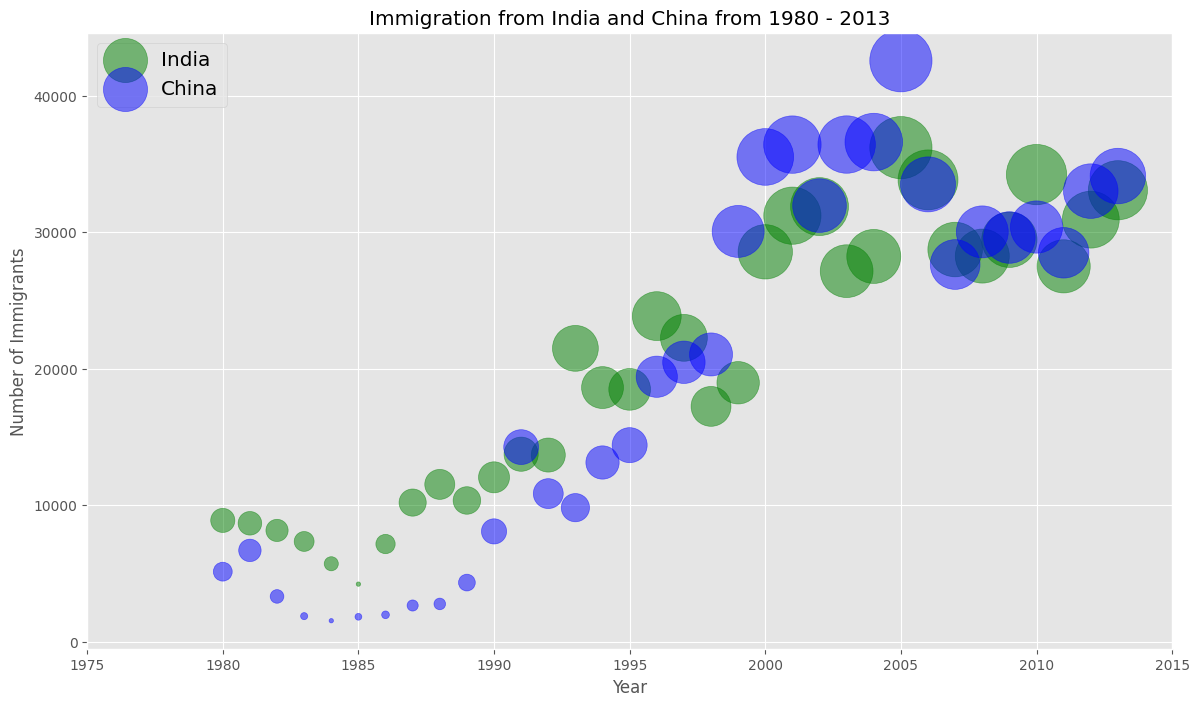

In [113]:
# Plot for India
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_india * 2000 + 10,   # pass in weights 
                    xlim=(1975, 2015)
                   )

# Plot for China
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    alpha=0.5,
                    color="blue",
                    s=norm_china * 2000 + 10,   # pass in weights
                    ax=ax0
                   )

# Set labels and title
ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from India and China from 1980 - 2013')
ax0.legend(['India', 'China'], loc='upper left', fontsize='x-large')

# Show the plot
plt.show()


### Waffle Charts

A waffle chart is an interesting visualization that is typically created to display progress toward goals. It is an effective option when you want to add engaging visual features to a visual that consists mainly of cells, such as an Excel dashboard.

Unfortunately, unlike R, waffle charts are not built into any of the Python visualization libraries. Therefore, we will learn how to create them from scratch.

**Step 1:** The first step in creating a waffle chart is determining the proportion of each category with respect to the total.

Let's revisit the previous case study about Denmark, Norway, and Sweden.



In [116]:
# Create a new DataFrame for Denmark, Norway, and Sweden
df_dsn = df_canada.loc[['Denmark', 'Norway', 'Sweden'], :]

# Display the DataFrame
df_dsn


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [117]:
# Compute the proportion of each category with respect to the total
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

# Print out proportions
for i, proportion in enumerate(category_proportions):
    print(df_dsn.index.values[i] + ': ' + str(proportion))


Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


In [118]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [119]:

# Compute the number of tiles for each category
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# Print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i] + ': ' + str(tiles))


Denmark: 129
Norway: 77
Sweden: 194



Based on the calculated proportions, Denmark will occupy 129 tiles of the waffle chart, Norway will occupy 77 tiles, and Sweden will occupy 194 tiles.

**Step 4:** The fourth step is creating a matrix that resembles the waffle chart and populating it.



In [121]:
# Initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# Define indices to loop through waffle chart
category_index = 0
tile_index = 0

# Populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # If the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1

        # Set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index

print('Waffle chart populated!')


Waffle chart populated!


As expected, the matrix consists of three categories, and the total number of each category's instances matches the total number of tiles allocated to each category.

**Step 5:** Map the waffle chart matrix into a visual.


<Figure size 640x480 with 0 Axes>

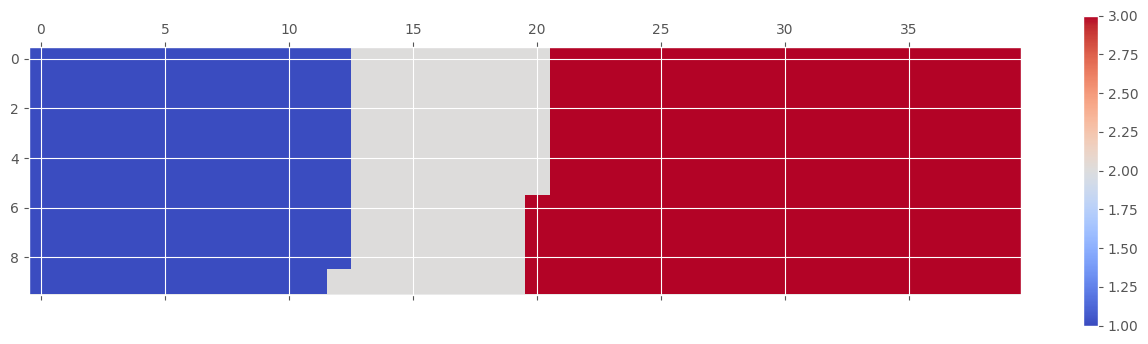

In [122]:
# Instantiate a new figure object
fig = plt.figure()

# Use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# Show the plot
plt.show()


<Figure size 640x480 with 0 Axes>

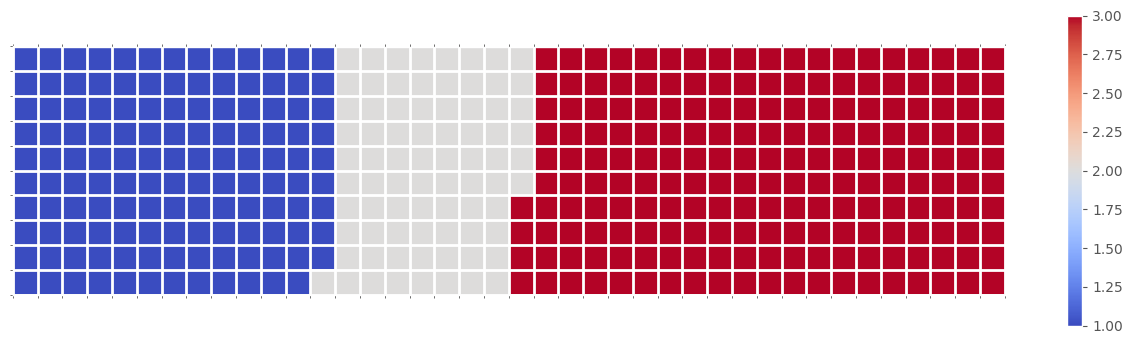

In [123]:
# Instantiate a new figure object
fig = plt.figure()

# Use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# Get the axis
ax = plt.gca()

# Set minor ticks
ax.set_xticks(np.arange(-.5, width, 1), minor=True)
ax.set_yticks(np.arange(-.5, height, 1), minor=True)

# Add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

# Remove major ticks
plt.xticks([])
plt.yticks([])

# Show the plot
plt.show()


/tmp/ipykernel_33/3152903051.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[-1]
/tmp/ipykernel_33/3152903051.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
/tmp/ipykernel_33/3152903051.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color_val = colormap(float(values_cumsum[i]) / total_values)


<Figure size 640x480 with 0 Axes>

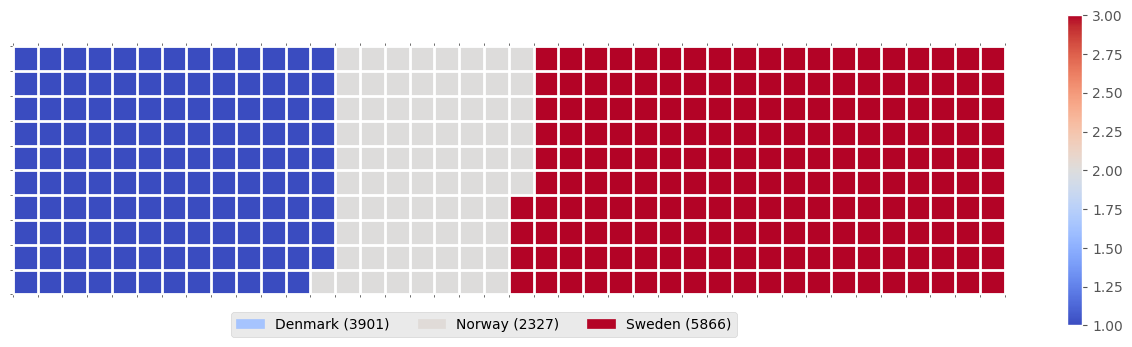

In [124]:
import matplotlib.patches as mpatches

# Instantiate a new figure object
fig = plt.figure()

# Use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# Get the axis
ax = plt.gca()

# Set minor ticks
ax.set_xticks(np.arange(-.5, width, 1), minor=True)
ax.set_yticks(np.arange(-.5, height, 1), minor=True)
    
# Add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# Compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[-1]

# Create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i]) / total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# Add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

# Show the plot
plt.show()


### Word Clouds

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

Luckily, a Python package already exists for generating word clouds. The package, called `word_cloud`, was developed by Andreas Mueller. You can learn more about the package by following this [link](https://github.com/amueller/word_cloud).

Let's use this package to learn how to generate a word cloud for a given text document.

First, let's install the package.


In [125]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [127]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


### Word Cloud is Installed and Imported!

Word clouds are commonly used to perform high-level analysis and visualization of text data. Accordingly, let's digress from the immigration dataset and work with an example that involves analyzing text data. 

Let's try to analyze a short novel written by Lewis Carroll titled *Alice's Adventures in Wonderland*. We'll start by downloading a .txt file of the novel.

Using countries with single-word names, let's duplicate each country's name based on how much they contribute to the total immigration.


In [130]:
# Calculate total immigration
total_immigration = df_canada['Total'].sum()
max_words = 90
word_string = ''

# Loop through each country in the DataFrame
for country in df_canada.index.values:
    # Check if the country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_canada.loc[country, 'Total'] / float(total_immigration) * max_words)
        word_string += (country + ' ') * repeat_num_times
                                     
# Display the generated text
word_string


'India India India India India India India India India China China China China China China China China China Philippines Philippines Philippines Philippines Philippines Philippines Philippines Pakistan Pakistan Pakistan Poland Lebanon France Jamaica Romania Haiti Guyana Portugal Egypt Morocco Colombia '

In [131]:
# create the word cloud
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


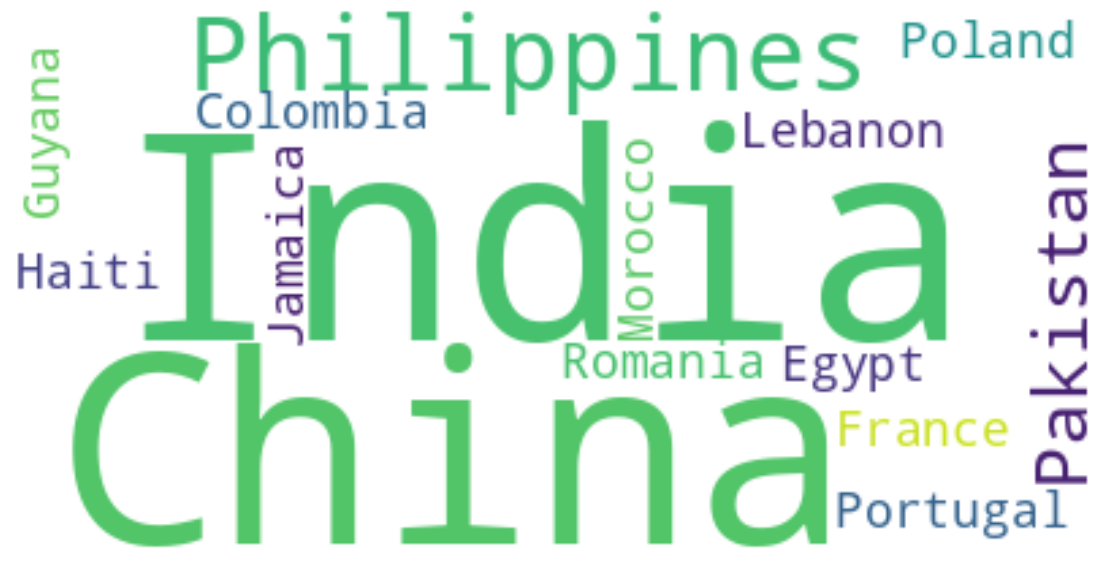

In [133]:
# Assuming 'wordcloud' is already created
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Choropleth Maps

A Choropleth map is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed, such as population density or per-capita income. The Choropleth map provides an easy way to visualize how a measurement varies across a geographic area or shows the level of variability within a region. Below is a Choropleth map of the US depicting the population by square mile per state.

Now, let's create our own Choropleth map of the world depicting immigration from various countries to Canada.

In order to create a Choropleth map, we need a GeoJSON file that defines the areas/boundaries of the state, county, or country that we are interested in. In our case, since we are endeavoring to create a world map, we want a GeoJSON file that defines the boundaries of all world countries. For your convenience, we will be providing you with this file, so let's go ahead and download it. Let's name it `world_countries.json`.


In [134]:
!wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [135]:
import folium

print('Folium installed and imported!')
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

Folium installed and imported!


### Folium Installed and Imported!

To create a Choropleth map, we will use the `choropleth` method with the following main parameters:

- **geo_data**: The GeoJSON file.
- **data**: The DataFrame containing the data.
- **columns**: The columns in the DataFrame that will be used to create the Choropleth map.
- **key_on**: The key or variable in the GeoJSON file that contains the name of the variable of interest. To determine this, you will need to open the GeoJSON file using any text editor and note the name of the key or variable that contains the names of the countries, as the countries are our variable of interest. In this case, `name` is the key in the GeoJSON file that contains the names of the countries. Note that this key is case-sensitive, so you need to pass it exactly as it exists in the GeoJSON file.


In [145]:

# Define the path to the GeoJSON file
world_geo = r'world_countries.json'

# Create a numpy array of length 6 with linear spacing from the minimum to maximum total immigration
threshold_scale = np.linspace(df_canada['Total'].min(),
                              df_canada['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist()  # Convert the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1  # Ensure the last value is greater than the maximum immigration

# Create a Folium map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Add the choropleth layer
folium.Choropleth(
    geo_data=world_geo,
    data=df_canada,
    columns=[df_canada.index.values, 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
).add_to(world_map)

# Display the map
world_map

# Generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
folium.Choropleth(
    geo_data=world_geo,
    data=df_canada,
    columns=[df_canada.index.values, 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
).add_to(world_map)

# Display the map
world_map


In [141]:
df_canada

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2


In [148]:
world_geo = r'world_countries.json'

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_canada['Total'].min(),
                              df_canada['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2)
folium.Choropleth(
    geo_data=world_geo,
    data=df_canada,
    columns=[df_canada.index.values, 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
).add_to(world_map)
world_map